# WG Projected Contiguous Dry Days

In [1]:
%matplotlib inline

In [2]:
import os
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as sstats
import datetime as dt
import sqlalchemy
import seaborn as sns

In [3]:
# all months for prism
WG_IN_DIR = r'C:\Temp\WG_Test_Out\Final\Processed'
OUT_DIR = r'C:\Temp\WG_Test_Out\Final\Processed\Comparison'
H1_DATA_ROOT = "H1_Data_DryDays_G"
H1_PROJ1_ROOT = "H1P1_DryDays_G"
H1_PROJ2_ROOT = "H1P2_DryDays_G"
H1_PROJ3_ROOT = "H1P3_DryDays_G"
PLOT_DIR = "Plots_ProjComp"
OUT_ROOT = "DC_WGMN4"

In [4]:
LOCA_KEYS = [ 62, 63, 64, 76, 77, 78, 79, 90, 91, 92, 93, 94,
              104, 105, 106, 107, 108, 120, 121, 122, 123, 137 ]
NUM_LOCA_GRID = len( LOCA_KEYS )

Next load all grid cells and concatenate from the WG

In [5]:
DFList = list()

In [6]:
for gG in LOCA_KEYS:
    cFile = "%s%d.pickle" % ( H1_DATA_ROOT, gG )
    InFP = os.path.normpath( os.path.join( WG_IN_DIR, cFile ) )
    cDF = pd.read_pickle( InFP )
    DFList.append( cDF )
# end of for

Now concatenate

In [7]:
NumDF = len( DFList )
NumDF

22

In [8]:
H1Data = pd.concat( DFList, ignore_index=True )

In [9]:
#display( HTML( H1Data.head().to_html() ) )

In [10]:
#display( HTML( H1Data.describe().to_html() ) )

In [11]:
DFList = list()
for gG in LOCA_KEYS:
    cFile = "%s%d.pickle" % ( H1_PROJ1_ROOT, gG )
    InFP = os.path.normpath( os.path.join( WG_IN_DIR, cFile ) )
    cDF = pd.read_pickle( InFP )
    DFList.append( cDF )
# end of for
H1Proj1 = pd.concat( DFList, ignore_index=True )

In [12]:
#display( HTML( H1Proj1.head().to_html() ) )

In [13]:
#display( HTML( H1Proj1.describe().to_html() ) )

In [14]:
DFList = list()
for gG in LOCA_KEYS:
    cFile = "%s%d.pickle" % ( H1_PROJ2_ROOT, gG )
    InFP = os.path.normpath( os.path.join( WG_IN_DIR, cFile ) )
    cDF = pd.read_pickle( InFP )
    DFList.append( cDF )
# end of for
H1Proj2 = pd.concat( DFList, ignore_index=True )

In [15]:
#display( HTML( H1Proj2.head().to_html() ) )

In [16]:
#display( HTML( H1Proj2.describe().to_html() ) )

In [17]:
DFList = list()
for gG in LOCA_KEYS:
    cFile = "%s%d.pickle" % ( H1_PROJ3_ROOT, gG )
    InFP = os.path.normpath( os.path.join( WG_IN_DIR, cFile ) )
    cDF = pd.read_pickle( InFP )
    DFList.append( cDF )
# end of for
H1Proj3 = pd.concat( DFList, ignore_index=True )

In [18]:
#display( HTML( H1Proj3.head().to_html() ) )

In [19]:
#display( HTML( H1Proj3.describe().to_html() ) )

Can now drop some columns

In [20]:
H1Data.drop( columns=['Year', 'Day'], inplace=True )
H1Proj1.drop( columns=['Year', 'Day'], inplace=True )
H1Proj2.drop( columns=['Year', 'Day'], inplace=True )
H1Proj3.drop( columns=['Year', 'Day'], inplace=True )

In [21]:
display(HTML( H1Data.head().to_html()))

,Month,Dry_Count
0,1,4
1,1,30
2,2,3
3,2,14
4,3,3


Now calculate our statistics so that can drop these arrays in a little bit

In [22]:
H1DAve =  H1Data['Dry_Count'].mean()
H1DVar =  H1Data['Dry_Count'].var()
H1DSkew = H1Data['Dry_Count'].skew()
H1DKurt = H1Data['Dry_Count'].kurtosis()
H1DCnt = H1Data['Dry_Count'].count()
H1DPlist = ( 1.0 - (( H1DVar - H1DAve ) / H1DVar) )
H1DNlist = ( H1DAve**2.0 / ( H1DVar - H1DAve ) )
H1DMedian = H1Data['Dry_Count'].median()
H1DMax = H1Data['Dry_Count'].max()
H1DMin = H1Data['Dry_Count'].min()

In [23]:
H1P1Ave =  H1Proj1['Dry_Count'].mean()
H1P1Var =  H1Proj1['Dry_Count'].var()
H1P1Skew = H1Proj1['Dry_Count'].skew()
H1P1Kurt = H1Proj1['Dry_Count'].kurtosis()
H1P1Cnt = H1Proj1['Dry_Count'].count()
H1P1Plist = ( 1.0 - (( H1P1Var - H1P1Ave ) / H1P1Var) )
H1P1Nlist = ( H1P1Ave**2.0 / ( H1P1Var - H1P1Ave ) )
H1P1Median = H1Proj1['Dry_Count'].median()
H1P1Max = H1Proj1['Dry_Count'].max()
H1P1Min = H1Proj1['Dry_Count'].min()

In [24]:
H1P2Ave =  H1Proj2['Dry_Count'].mean()
H1P2Var =  H1Proj2['Dry_Count'].var()
H1P2Skew = H1Proj2['Dry_Count'].skew()
H1P2Kurt = H1Proj2['Dry_Count'].kurtosis()
H1P2Cnt = H1Proj2['Dry_Count'].count()
H1P2Plist = ( 1.0 - (( H1P2Var - H1P2Ave ) / H1P2Var) )
H1P2Nlist = ( H1P2Ave**2.0 / ( H1P2Var - H1P2Ave ) )
H1P2Median = H1Proj2['Dry_Count'].median()
H1P2Max = H1Proj2['Dry_Count'].max()
H1P2Min = H1Proj2['Dry_Count'].min()

In [25]:
H1P3Ave =  H1Proj3['Dry_Count'].mean()
H1P3Var =  H1Proj3['Dry_Count'].var()
H1P3Skew = H1Proj3['Dry_Count'].skew()
H1P3Kurt = H1Proj3['Dry_Count'].kurtosis()
H1P3Cnt = H1Proj3['Dry_Count'].count()
H1P3Plist = ( 1.0 - (( H1P3Var - H1P3Ave ) / H1P3Var) )
H1P3Nlist = ( H1P3Ave**3.0 / ( H1P3Var - H1P3Ave ) )
H1P3Median = H1Proj3['Dry_Count'].median()
H1P3Max = H1Proj3['Dry_Count'].max()
H1P3Min = H1Proj3['Dry_Count'].min()

Now filter all into monthly values

In [26]:
H1DJanDF = H1Data[H1Data['Month'] == 1].copy()
H1DFebDF = H1Data[H1Data['Month'] == 2].copy()
H1DMarDF = H1Data[H1Data['Month'] == 3].copy()
H1DAprDF = H1Data[H1Data['Month'] == 4].copy()
H1DMayDF = H1Data[H1Data['Month'] == 5].copy()
H1DJunDF = H1Data[H1Data['Month'] == 6].copy()
H1DJulDF = H1Data[H1Data['Month'] == 7].copy()
H1DAugDF = H1Data[H1Data['Month'] == 8].copy()
H1DSepDF = H1Data[H1Data['Month'] == 9].copy()
H1DOctDF = H1Data[H1Data['Month'] == 10].copy()
H1DNovDF = H1Data[H1Data['Month'] == 11].copy()
H1DDecDF = H1Data[H1Data['Month'] == 12].copy()

In [27]:
del H1Data

In [28]:
H1P1JanDF = H1Proj1[H1Proj1['Month'] == 1].copy()
H1P1FebDF = H1Proj1[H1Proj1['Month'] == 2].copy()
H1P1MarDF = H1Proj1[H1Proj1['Month'] == 3].copy()
H1P1AprDF = H1Proj1[H1Proj1['Month'] == 4].copy()
H1P1MayDF = H1Proj1[H1Proj1['Month'] == 5].copy()
H1P1JunDF = H1Proj1[H1Proj1['Month'] == 6].copy()
H1P1JulDF = H1Proj1[H1Proj1['Month'] == 7].copy()
H1P1AugDF = H1Proj1[H1Proj1['Month'] == 8].copy()
H1P1SepDF = H1Proj1[H1Proj1['Month'] == 9].copy()
H1P1OctDF = H1Proj1[H1Proj1['Month'] == 10].copy()
H1P1NovDF = H1Proj1[H1Proj1['Month'] == 11].copy()
H1P1DecDF = H1Proj1[H1Proj1['Month'] == 12].copy()

In [29]:
del H1Proj1

In [30]:
H1P2JanDF = H1Proj2[H1Proj2['Month'] == 1].copy()
H1P2FebDF = H1Proj2[H1Proj2['Month'] == 2].copy()
H1P2MarDF = H1Proj2[H1Proj2['Month'] == 3].copy()
H1P2AprDF = H1Proj2[H1Proj2['Month'] == 4].copy()
H1P2MayDF = H1Proj2[H1Proj2['Month'] == 5].copy()
H1P2JunDF = H1Proj2[H1Proj2['Month'] == 6].copy()
H1P2JulDF = H1Proj2[H1Proj2['Month'] == 7].copy()
H1P2AugDF = H1Proj2[H1Proj2['Month'] == 8].copy()
H1P2SepDF = H1Proj2[H1Proj2['Month'] == 9].copy()
H1P2OctDF = H1Proj2[H1Proj2['Month'] == 10].copy()
H1P2NovDF = H1Proj2[H1Proj2['Month'] == 11].copy()
H1P2DecDF = H1Proj2[H1Proj2['Month'] == 12].copy()

In [31]:
del H1Proj2

In [32]:
H1P3JanDF = H1Proj3[H1Proj3['Month'] == 1].copy()
H1P3FebDF = H1Proj3[H1Proj3['Month'] == 2].copy()
H1P3MarDF = H1Proj3[H1Proj3['Month'] == 3].copy()
H1P3AprDF = H1Proj3[H1Proj3['Month'] == 4].copy()
H1P3MayDF = H1Proj3[H1Proj3['Month'] == 5].copy()
H1P3JunDF = H1Proj3[H1Proj3['Month'] == 6].copy()
H1P3JulDF = H1Proj3[H1Proj3['Month'] == 7].copy()
H1P3AugDF = H1Proj3[H1Proj3['Month'] == 8].copy()
H1P3SepDF = H1Proj3[H1Proj3['Month'] == 9].copy()
H1P3OctDF = H1Proj3[H1Proj3['Month'] == 10].copy()
H1P3NovDF = H1Proj3[H1Proj3['Month'] == 11].copy()
H1P3DecDF = H1Proj3[H1Proj3['Month'] == 12].copy()

Now drop our big arrays to save some memory

In [33]:
del H1Proj3

In [34]:
MonthLister = [ "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", 
                 "Sep", "Oct", "Nov", "Dec", "All" ]
AveLister = list()
VarLister = list()
SkewLister = list()
KurtLister = list()
PLister = list()
NLister = list()
CntLister = list()
MedianLister = list()
MaxLister = list()
MinLister = list()

In [35]:
OurQs = np.array( [ round( 0.01 * x, 2 ) for x in range(101) ], dtype=np.float32 )
NumQs = len( OurQs )
NumQs

101

## Jan

In [36]:
AveLister.append( [ H1DJanDF['Dry_Count'].mean(), H1P1JanDF['Dry_Count'].mean(), 
                    H1P2JanDF['Dry_Count'].mean(), H1P3JanDF['Dry_Count'].mean() ] )
VarLister.append( [ H1DJanDF['Dry_Count'].var(), H1P1JanDF['Dry_Count'].var(),
                    H1P2JanDF['Dry_Count'].var(), H1P3JanDF['Dry_Count'].var() ] )
SkewLister.append( [ H1DJanDF['Dry_Count'].skew(), H1P1JanDF['Dry_Count'].skew(),
                     H1P2JanDF['Dry_Count'].skew(), H1P3JanDF['Dry_Count'].skew() ] )
KurtLister.append( [ H1DJanDF['Dry_Count'].kurtosis(), H1P1JanDF['Dry_Count'].kurtosis(),
                     H1P2JanDF['Dry_Count'].kurtosis(), H1P3JanDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ H1DJanDF['Dry_Count'].count(), H1P1JanDF['Dry_Count'].count(),
                    H1P2JanDF['Dry_Count'].count(), H1P3JanDF['Dry_Count'].count() ] )
P1Data = (1.0 - (( H1DJanDF['Dry_Count'].var() - H1DJanDF['Dry_Count'].mean() ) / 
                           H1DJanDF['Dry_Count'].var() ) )
P1Proj1 = (1.0 - (( H1P1JanDF['Dry_Count'].var() - H1P1JanDF['Dry_Count'].mean() ) / 
                           H1P1JanDF['Dry_Count'].var() ) )
P1Proj2 = (1.0 - (( H1P2JanDF['Dry_Count'].var() - H1P2JanDF['Dry_Count'].mean() ) / 
                           H1P2JanDF['Dry_Count'].var() ) )
P1Proj3 = (1.0 - (( H1P3JanDF['Dry_Count'].var() - H1P3JanDF['Dry_Count'].mean() ) / 
                           H1P3JanDF['Dry_Count'].var() ) )
PLister.append( [ P1Data, P1Proj1, P1Proj2, P1Proj3 ] )
N1Data = ( H1DJanDF['Dry_Count'].mean()**2.0 / 
         ( H1DJanDF['Dry_Count'].var() - H1DJanDF['Dry_Count'].mean() ) )
N1Proj1 = ( H1P1JanDF['Dry_Count'].mean()**2.0 / 
          ( H1P1JanDF['Dry_Count'].var() - H1P1JanDF['Dry_Count'].mean() ) )
N1Proj2 = ( H1P2JanDF['Dry_Count'].mean()**2.0 / 
          ( H1P2JanDF['Dry_Count'].var() - H1P2JanDF['Dry_Count'].mean() ) )
N1Proj3 = ( H1P3JanDF['Dry_Count'].mean()**2.0 / 
          ( H1P3JanDF['Dry_Count'].var() - H1P3JanDF['Dry_Count'].mean() ) )
NLister.append( [ N1Data, N1Proj1, N1Proj2, N1Proj3 ] )
MedianLister.append( [ H1DJanDF['Dry_Count'].median(), H1P1JanDF['Dry_Count'].median(),
                       H1P2JanDF['Dry_Count'].median(), H1P3JanDF['Dry_Count'].median() ] )
MaxLister.append( [ H1DJanDF['Dry_Count'].max(), H1P1JanDF['Dry_Count'].max(),
                    H1P2JanDF['Dry_Count'].max(), H1P3JanDF['Dry_Count'].max() ] )
MinLister.append( [ H1DJanDF['Dry_Count'].min(), H1P1JanDF['Dry_Count'].min(),
                    H1P2JanDF['Dry_Count'].min(), H1P3JanDF['Dry_Count'].min() ] )

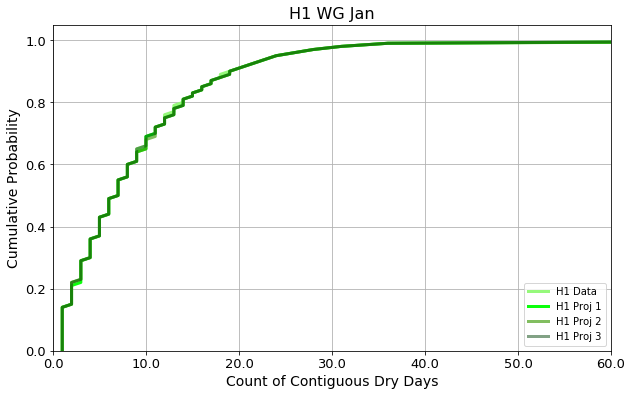

In [37]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( H1DJanDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:light green', label='H1 Data')
ax11.plot( H1P1JanDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:neon green', label='H1 Proj 1')
ax11.plot( H1P2JanDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:grass green', alpha=0.65, label='H1 Proj 2')
ax11.plot( H1P3JanDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:forest green', alpha=0.5, label='H1 Proj 3')
ax11.set_xlim( (0.0, 60.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("H1 WG Jan", fontsize=16)
ax11.set_xlabel('Count of Contiguous Dry Days', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [38]:
DatQs = H1DJanDF['Dry_Count'].quantile( q=OurQs )
P1Qs = H1P1JanDF['Dry_Count'].quantile( q=OurQs )
P2Qs = H1P2JanDF['Dry_Count'].quantile( q=OurQs )
P3Qs = H1P3JanDF['Dry_Count'].quantile( q=OurQs )

In [39]:
MaxVal = 50.0

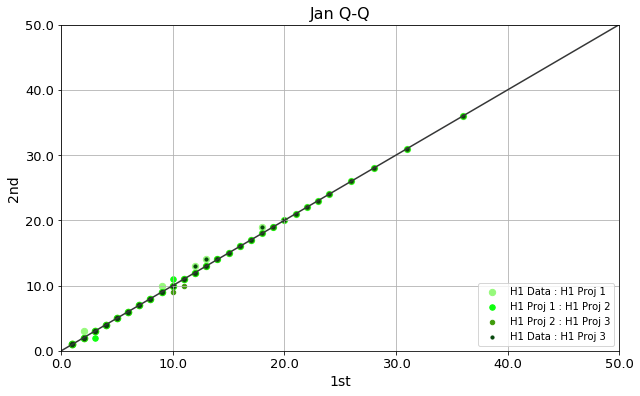

In [40]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DatQs.values, P1Qs.values, marker='o', color='xkcd:light green',
              label="H1 Data : H1 Proj 1", s=40 )
ax11.scatter( P1Qs.values, P2Qs.values, marker='o', color='xkcd:neon green',
              label="H1 Proj 1 : H1 Proj 2", s=30 )
ax11.scatter( P2Qs.values, P3Qs.values, marker='o', color='xkcd:grass green',
              label="H1 Proj 2 : H1 Proj 3", s=20)
ax11.scatter( DatQs.values, P3Qs.values, marker='o', color='xkcd:forest green',
              label="H1 Data : H1 Proj 3", s=10 )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jan Q-Q", fontsize=16)
ax11.set_xlabel('1st', fontsize=14 )
ax11.set_ylabel('2nd', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

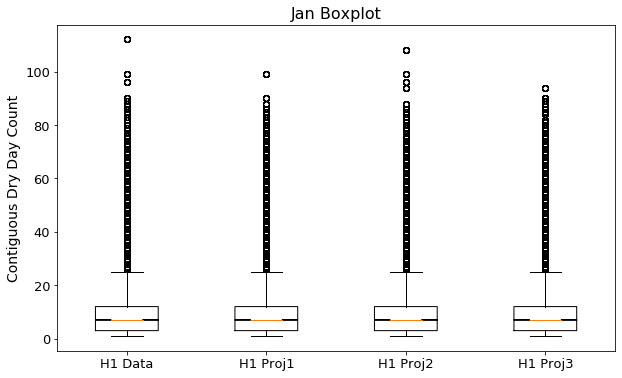

In [41]:
plotData = [ H1DJanDF['Dry_Count'].to_numpy(), H1P1JanDF['Dry_Count'].to_numpy(), 
             H1P2JanDF['Dry_Count'].to_numpy(), H1P3JanDF['Dry_Count'].to_numpy() ]
plotLabels = [ "H1 Data", "H1 Proj1", "H1 Proj2", "H1 Proj3" ]
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
bxout = ax11.boxplot( plotData, labels=plotLabels, notch=True )
ax11.set_title("Jan Boxplot", fontsize=16)
ax11.set_ylabel('Contiguous Dry Day Count', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)

## Feb

In [42]:
AveLister.append( [ H1DFebDF['Dry_Count'].mean(), H1P1FebDF['Dry_Count'].mean(), 
                    H1P2FebDF['Dry_Count'].mean(), H1P3FebDF['Dry_Count'].mean() ] )
VarLister.append( [ H1DFebDF['Dry_Count'].var(), H1P1FebDF['Dry_Count'].var(),
                    H1P2FebDF['Dry_Count'].var(), H1P3FebDF['Dry_Count'].var() ] )
SkewLister.append( [ H1DFebDF['Dry_Count'].skew(), H1P1FebDF['Dry_Count'].skew(),
                     H1P2FebDF['Dry_Count'].skew(), H1P3FebDF['Dry_Count'].skew() ] )
KurtLister.append( [ H1DFebDF['Dry_Count'].kurtosis(), H1P1FebDF['Dry_Count'].kurtosis(),
                     H1P2FebDF['Dry_Count'].kurtosis(), H1P3FebDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ H1DFebDF['Dry_Count'].count(), H1P1FebDF['Dry_Count'].count(),
                    H1P2FebDF['Dry_Count'].count(), H1P3FebDF['Dry_Count'].count() ] )
P1Data = (1.0 - (( H1DFebDF['Dry_Count'].var() - H1DFebDF['Dry_Count'].mean() ) / 
                           H1DFebDF['Dry_Count'].var() ) )
P1Proj1 = (1.0 - (( H1P1FebDF['Dry_Count'].var() - H1P1FebDF['Dry_Count'].mean() ) / 
                           H1P1FebDF['Dry_Count'].var() ) )
P1Proj2 = (1.0 - (( H1P2FebDF['Dry_Count'].var() - H1P2FebDF['Dry_Count'].mean() ) / 
                           H1P2FebDF['Dry_Count'].var() ) )
P1Proj3 = (1.0 - (( H1P3FebDF['Dry_Count'].var() - H1P3FebDF['Dry_Count'].mean() ) / 
                           H1P3FebDF['Dry_Count'].var() ) )
PLister.append( [ P1Data, P1Proj1, P1Proj2, P1Proj3 ] )
N1Data = ( H1DFebDF['Dry_Count'].mean()**2.0 / 
         ( H1DFebDF['Dry_Count'].var() - H1DFebDF['Dry_Count'].mean() ) )
N1Proj1 = ( H1P1FebDF['Dry_Count'].mean()**2.0 / 
          ( H1P1FebDF['Dry_Count'].var() - H1P1FebDF['Dry_Count'].mean() ) )
N1Proj2 = ( H1P2FebDF['Dry_Count'].mean()**2.0 / 
          ( H1P2FebDF['Dry_Count'].var() - H1P2FebDF['Dry_Count'].mean() ) )
N1Proj3 = ( H1P3FebDF['Dry_Count'].mean()**2.0 / 
          ( H1P3FebDF['Dry_Count'].var() - H1P3FebDF['Dry_Count'].mean() ) )
NLister.append( [ N1Data, N1Proj1, N1Proj2, N1Proj3 ] )
MedianLister.append( [ H1DFebDF['Dry_Count'].median(), H1P1FebDF['Dry_Count'].median(),
                       H1P2FebDF['Dry_Count'].median(), H1P3FebDF['Dry_Count'].median() ] )
MaxLister.append( [ H1DFebDF['Dry_Count'].max(), H1P1FebDF['Dry_Count'].max(),
                    H1P2FebDF['Dry_Count'].max(), H1P3FebDF['Dry_Count'].max() ] )
MinLister.append( [ H1DFebDF['Dry_Count'].min(), H1P1FebDF['Dry_Count'].min(),
                    H1P2FebDF['Dry_Count'].min(), H1P3FebDF['Dry_Count'].min() ] )

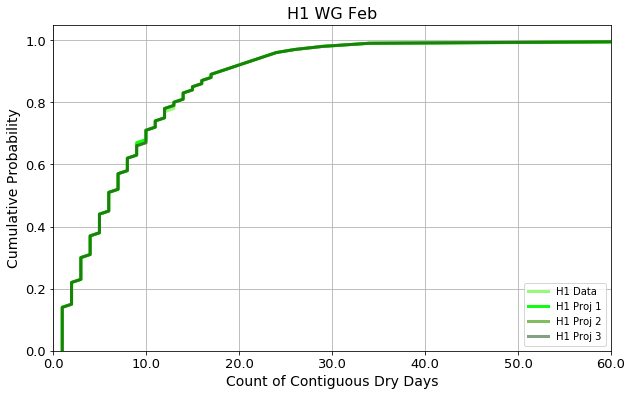

In [43]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( H1DFebDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:light green', label='H1 Data')
ax11.plot( H1P1FebDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:neon green', label='H1 Proj 1')
ax11.plot( H1P2FebDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:grass green', alpha=0.65, label='H1 Proj 2')
ax11.plot( H1P3FebDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:forest green', alpha=0.5, label='H1 Proj 3')
ax11.set_xlim( (0.0, 60.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("H1 WG Feb", fontsize=16)
ax11.set_xlabel('Count of Contiguous Dry Days', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [44]:
DatQs = H1DFebDF['Dry_Count'].quantile( q=OurQs )
P1Qs = H1P1FebDF['Dry_Count'].quantile( q=OurQs )
P2Qs = H1P2FebDF['Dry_Count'].quantile( q=OurQs )
P3Qs = H1P3FebDF['Dry_Count'].quantile( q=OurQs )

In [45]:
MaxVal = 40.0

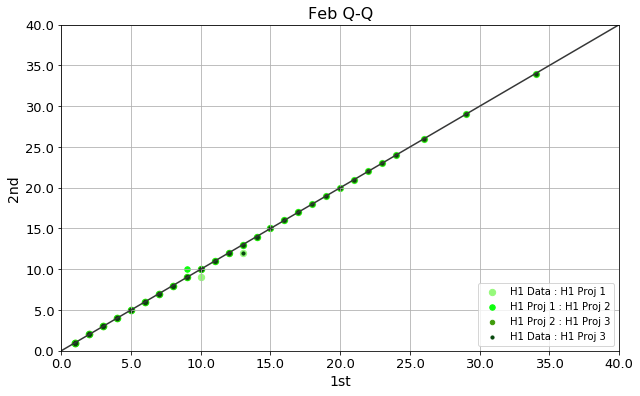

In [46]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DatQs.values, P1Qs.values, marker='o', color='xkcd:light green',
              label="H1 Data : H1 Proj 1", s=40 )
ax11.scatter( P1Qs.values, P2Qs.values, marker='o', color='xkcd:neon green',
              label="H1 Proj 1 : H1 Proj 2", s=30 )
ax11.scatter( P2Qs.values, P3Qs.values, marker='o', color='xkcd:grass green',
              label="H1 Proj 2 : H1 Proj 3", s=20)
ax11.scatter( DatQs.values, P3Qs.values, marker='o', color='xkcd:forest green',
              label="H1 Data : H1 Proj 3", s=10 )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Feb Q-Q", fontsize=16)
ax11.set_xlabel('1st', fontsize=14 )
ax11.set_ylabel('2nd', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

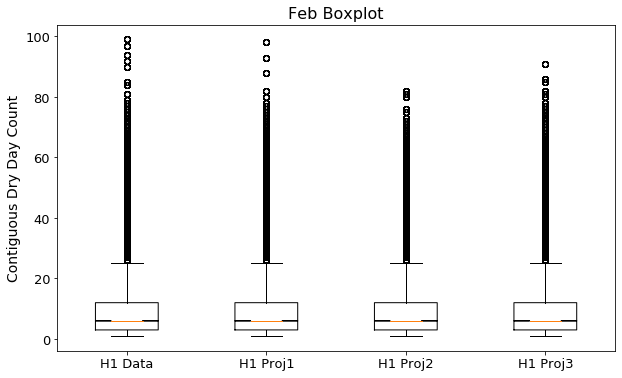

In [47]:
plotData = [ H1DFebDF['Dry_Count'].to_numpy(), H1P1FebDF['Dry_Count'].to_numpy(), 
             H1P2FebDF['Dry_Count'].to_numpy(), H1P3FebDF['Dry_Count'].to_numpy() ]
plotLabels = [ "H1 Data", "H1 Proj1", "H1 Proj2", "H1 Proj3" ]
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
bxout = ax11.boxplot( plotData, labels=plotLabels, notch=True )
ax11.set_title("Feb Boxplot", fontsize=16)
ax11.set_ylabel('Contiguous Dry Day Count', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)

## Mar

In [48]:
AveLister.append( [ H1DMarDF['Dry_Count'].mean(), H1P1MarDF['Dry_Count'].mean(), 
                    H1P2MarDF['Dry_Count'].mean(), H1P3MarDF['Dry_Count'].mean() ] )
VarLister.append( [ H1DMarDF['Dry_Count'].var(), H1P1MarDF['Dry_Count'].var(),
                    H1P2MarDF['Dry_Count'].var(), H1P3MarDF['Dry_Count'].var() ] )
SkewLister.append( [ H1DMarDF['Dry_Count'].skew(), H1P1MarDF['Dry_Count'].skew(),
                     H1P2MarDF['Dry_Count'].skew(), H1P3MarDF['Dry_Count'].skew() ] )
KurtLister.append( [ H1DMarDF['Dry_Count'].kurtosis(), H1P1MarDF['Dry_Count'].kurtosis(),
                     H1P2MarDF['Dry_Count'].kurtosis(), H1P3MarDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ H1DMarDF['Dry_Count'].count(), H1P1MarDF['Dry_Count'].count(),
                    H1P2MarDF['Dry_Count'].count(), H1P3MarDF['Dry_Count'].count() ] )
P1Data = (1.0 - (( H1DMarDF['Dry_Count'].var() - H1DMarDF['Dry_Count'].mean() ) / 
                           H1DMarDF['Dry_Count'].var() ) )
P1Proj1 = (1.0 - (( H1P1MarDF['Dry_Count'].var() - H1P1MarDF['Dry_Count'].mean() ) / 
                           H1P1MarDF['Dry_Count'].var() ) )
P1Proj2 = (1.0 - (( H1P2MarDF['Dry_Count'].var() - H1P2MarDF['Dry_Count'].mean() ) / 
                           H1P2MarDF['Dry_Count'].var() ) )
P1Proj3 = (1.0 - (( H1P3MarDF['Dry_Count'].var() - H1P3MarDF['Dry_Count'].mean() ) / 
                           H1P3MarDF['Dry_Count'].var() ) )
PLister.append( [ P1Data, P1Proj1, P1Proj2, P1Proj3 ] )
N1Data = ( H1DMarDF['Dry_Count'].mean()**2.0 / 
         ( H1DMarDF['Dry_Count'].var() - H1DMarDF['Dry_Count'].mean() ) )
N1Proj1 = ( H1P1MarDF['Dry_Count'].mean()**2.0 / 
          ( H1P1MarDF['Dry_Count'].var() - H1P1MarDF['Dry_Count'].mean() ) )
N1Proj2 = ( H1P2MarDF['Dry_Count'].mean()**2.0 / 
          ( H1P2MarDF['Dry_Count'].var() - H1P2MarDF['Dry_Count'].mean() ) )
N1Proj3 = ( H1P3MarDF['Dry_Count'].mean()**2.0 / 
          ( H1P3MarDF['Dry_Count'].var() - H1P3MarDF['Dry_Count'].mean() ) )
NLister.append( [ N1Data, N1Proj1, N1Proj2, N1Proj3 ] )
MedianLister.append( [ H1DMarDF['Dry_Count'].median(), H1P1MarDF['Dry_Count'].median(),
                       H1P2MarDF['Dry_Count'].median(), H1P3MarDF['Dry_Count'].median() ] )
MaxLister.append( [ H1DMarDF['Dry_Count'].max(), H1P1MarDF['Dry_Count'].max(),
                    H1P2MarDF['Dry_Count'].max(), H1P3MarDF['Dry_Count'].max() ] )
MinLister.append( [ H1DMarDF['Dry_Count'].min(), H1P1MarDF['Dry_Count'].min(),
                    H1P2MarDF['Dry_Count'].min(), H1P3MarDF['Dry_Count'].min() ] )

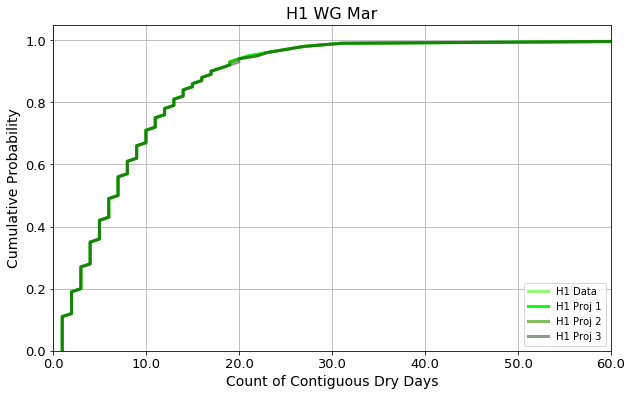

In [49]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( H1DMarDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:light green', label='H1 Data')
ax11.plot( H1P1MarDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:neon green', label='H1 Proj 1')
ax11.plot( H1P2MarDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:grass green', alpha=0.65, label='H1 Proj 2')
ax11.plot( H1P3MarDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:forest green', alpha=0.5, label='H1 Proj 3')
ax11.set_xlim( (0.0, 60.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("H1 WG Mar", fontsize=16)
ax11.set_xlabel('Count of Contiguous Dry Days', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [50]:
DatQs = H1DMarDF['Dry_Count'].quantile( q=OurQs )
P1Qs = H1P1MarDF['Dry_Count'].quantile( q=OurQs )
P2Qs = H1P2MarDF['Dry_Count'].quantile( q=OurQs )
P3Qs = H1P3MarDF['Dry_Count'].quantile( q=OurQs )

In [51]:
MaxVal = 40.0

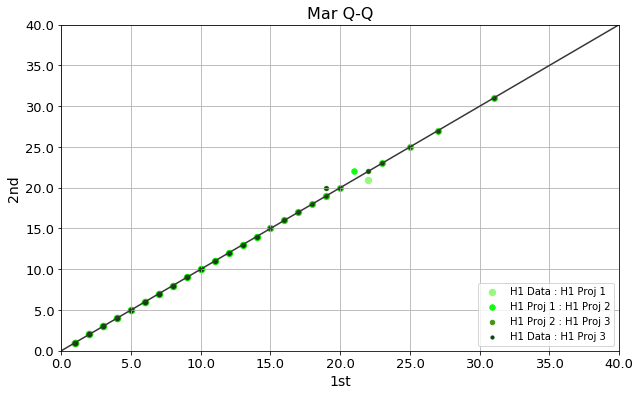

In [52]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DatQs.values, P1Qs.values, marker='o', color='xkcd:light green',
              label="H1 Data : H1 Proj 1", s=40 )
ax11.scatter( P1Qs.values, P2Qs.values, marker='o', color='xkcd:neon green',
              label="H1 Proj 1 : H1 Proj 2", s=30 )
ax11.scatter( P2Qs.values, P3Qs.values, marker='o', color='xkcd:grass green',
              label="H1 Proj 2 : H1 Proj 3", s=20)
ax11.scatter( DatQs.values, P3Qs.values, marker='o', color='xkcd:forest green',
              label="H1 Data : H1 Proj 3", s=10 )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Mar Q-Q", fontsize=16)
ax11.set_xlabel('1st', fontsize=14 )
ax11.set_ylabel('2nd', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

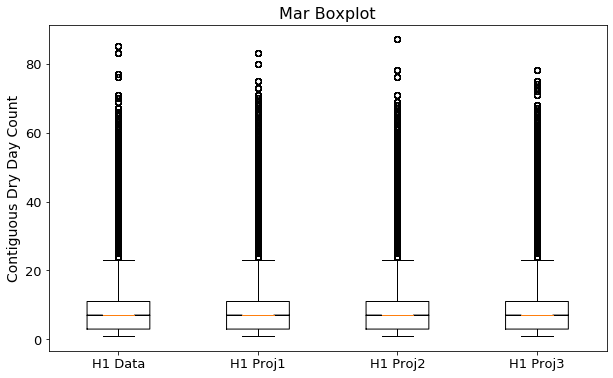

In [53]:
plotData = [ H1DMarDF['Dry_Count'].to_numpy(), H1P1MarDF['Dry_Count'].to_numpy(), 
             H1P2MarDF['Dry_Count'].to_numpy(), H1P3MarDF['Dry_Count'].to_numpy() ]
plotLabels = [ "H1 Data", "H1 Proj1", "H1 Proj2", "H1 Proj3" ]
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
bxout = ax11.boxplot( plotData, labels=plotLabels, notch=True )
ax11.set_title("Mar Boxplot", fontsize=16)
ax11.set_ylabel('Contiguous Dry Day Count', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)

## Apr

In [54]:
AveLister.append( [ H1DAprDF['Dry_Count'].mean(), H1P1AprDF['Dry_Count'].mean(), 
                    H1P2AprDF['Dry_Count'].mean(), H1P3AprDF['Dry_Count'].mean() ] )
VarLister.append( [ H1DAprDF['Dry_Count'].var(), H1P1AprDF['Dry_Count'].var(),
                    H1P2AprDF['Dry_Count'].var(), H1P3AprDF['Dry_Count'].var() ] )
SkewLister.append( [ H1DAprDF['Dry_Count'].skew(), H1P1AprDF['Dry_Count'].skew(),
                     H1P2AprDF['Dry_Count'].skew(), H1P3AprDF['Dry_Count'].skew() ] )
KurtLister.append( [ H1DAprDF['Dry_Count'].kurtosis(), H1P1AprDF['Dry_Count'].kurtosis(),
                     H1P2AprDF['Dry_Count'].kurtosis(), H1P3AprDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ H1DAprDF['Dry_Count'].count(), H1P1AprDF['Dry_Count'].count(),
                    H1P2AprDF['Dry_Count'].count(), H1P3AprDF['Dry_Count'].count() ] )
P1Data = (1.0 - (( H1DAprDF['Dry_Count'].var() - H1DAprDF['Dry_Count'].mean() ) / 
                           H1DAprDF['Dry_Count'].var() ) )
P1Proj1 = (1.0 - (( H1P1AprDF['Dry_Count'].var() - H1P1AprDF['Dry_Count'].mean() ) / 
                           H1P1AprDF['Dry_Count'].var() ) )
P1Proj2 = (1.0 - (( H1P2AprDF['Dry_Count'].var() - H1P2AprDF['Dry_Count'].mean() ) / 
                           H1P2AprDF['Dry_Count'].var() ) )
P1Proj3 = (1.0 - (( H1P3AprDF['Dry_Count'].var() - H1P3AprDF['Dry_Count'].mean() ) / 
                           H1P3AprDF['Dry_Count'].var() ) )
PLister.append( [ P1Data, P1Proj1, P1Proj2, P1Proj3 ] )
N1Data = ( H1DAprDF['Dry_Count'].mean()**2.0 / 
         ( H1DAprDF['Dry_Count'].var() - H1DAprDF['Dry_Count'].mean() ) )
N1Proj1 = ( H1P1AprDF['Dry_Count'].mean()**2.0 / 
          ( H1P1AprDF['Dry_Count'].var() - H1P1AprDF['Dry_Count'].mean() ) )
N1Proj2 = ( H1P2AprDF['Dry_Count'].mean()**2.0 / 
          ( H1P2AprDF['Dry_Count'].var() - H1P2AprDF['Dry_Count'].mean() ) )
N1Proj3 = ( H1P3AprDF['Dry_Count'].mean()**2.0 / 
          ( H1P3AprDF['Dry_Count'].var() - H1P3AprDF['Dry_Count'].mean() ) )
NLister.append( [ N1Data, N1Proj1, N1Proj2, N1Proj3 ] )
MedianLister.append( [ H1DAprDF['Dry_Count'].median(), H1P1AprDF['Dry_Count'].median(),
                       H1P2AprDF['Dry_Count'].median(), H1P3AprDF['Dry_Count'].median() ] )
MaxLister.append( [ H1DAprDF['Dry_Count'].max(), H1P1AprDF['Dry_Count'].max(),
                    H1P2AprDF['Dry_Count'].max(), H1P3AprDF['Dry_Count'].max() ] )
MinLister.append( [ H1DAprDF['Dry_Count'].min(), H1P1AprDF['Dry_Count'].min(),
                    H1P2AprDF['Dry_Count'].min(), H1P3AprDF['Dry_Count'].min() ] )

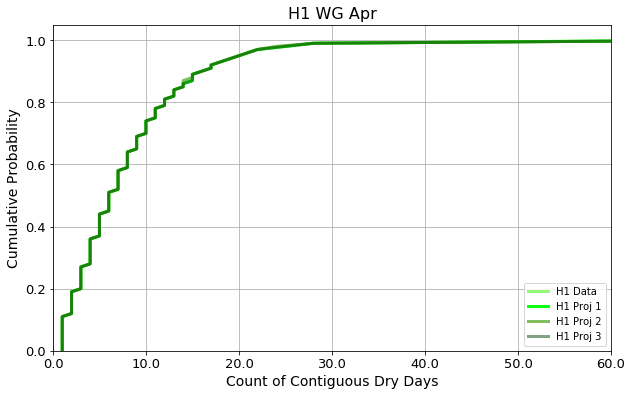

In [55]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( H1DAprDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:light green', label='H1 Data')
ax11.plot( H1P1AprDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:neon green', label='H1 Proj 1')
ax11.plot( H1P2AprDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:grass green', alpha=0.65, label='H1 Proj 2')
ax11.plot( H1P3AprDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:forest green', alpha=0.5, label='H1 Proj 3')
ax11.set_xlim( (0.0, 60.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("H1 WG Apr", fontsize=16)
ax11.set_xlabel('Count of Contiguous Dry Days', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [56]:
DatQs = H1DAprDF['Dry_Count'].quantile( q=OurQs )
P1Qs = H1P1AprDF['Dry_Count'].quantile( q=OurQs )
P2Qs = H1P2AprDF['Dry_Count'].quantile( q=OurQs )
P3Qs = H1P3AprDF['Dry_Count'].quantile( q=OurQs )

In [57]:
MaxVal = 40.0

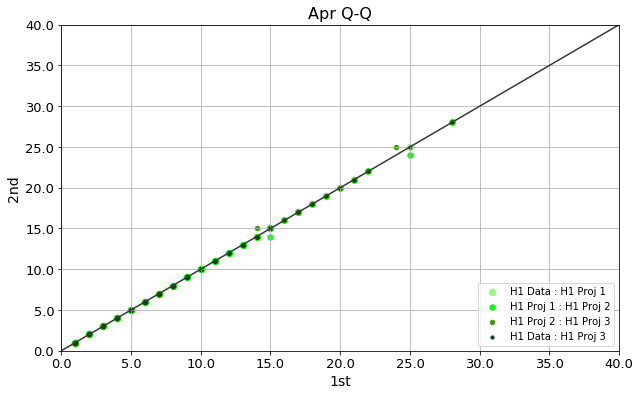

In [58]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DatQs.values, P1Qs.values, marker='o', color='xkcd:light green',
              label="H1 Data : H1 Proj 1", s=40 )
ax11.scatter( P1Qs.values, P2Qs.values, marker='o', color='xkcd:neon green',
              label="H1 Proj 1 : H1 Proj 2", s=30 )
ax11.scatter( P2Qs.values, P3Qs.values, marker='o', color='xkcd:grass green',
              label="H1 Proj 2 : H1 Proj 3", s=20)
ax11.scatter( DatQs.values, P3Qs.values, marker='o', color='xkcd:forest green',
              label="H1 Data : H1 Proj 3", s=10 )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Apr Q-Q", fontsize=16)
ax11.set_xlabel('1st', fontsize=14 )
ax11.set_ylabel('2nd', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

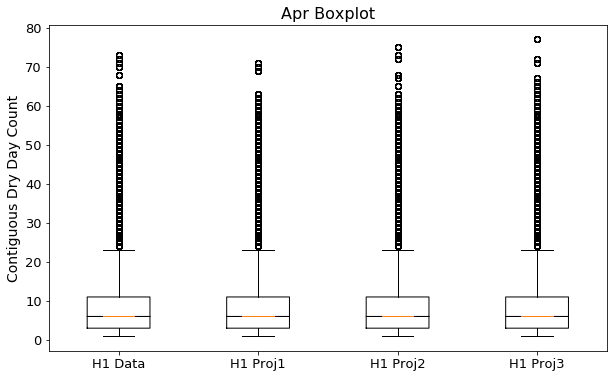

In [59]:
plotData = [ H1DAprDF['Dry_Count'].to_numpy(), H1P1AprDF['Dry_Count'].to_numpy(), 
             H1P2AprDF['Dry_Count'].to_numpy(), H1P3AprDF['Dry_Count'].to_numpy() ]
plotLabels = [ "H1 Data", "H1 Proj1", "H1 Proj2", "H1 Proj3" ]
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
bxout = ax11.boxplot( plotData, labels=plotLabels, notch=True )
ax11.set_title("Apr Boxplot", fontsize=16)
ax11.set_ylabel('Contiguous Dry Day Count', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)

## May

In [60]:
AveLister.append( [ H1DMayDF['Dry_Count'].mean(), H1P1MayDF['Dry_Count'].mean(), 
                    H1P2MayDF['Dry_Count'].mean(), H1P3MayDF['Dry_Count'].mean() ] )
VarLister.append( [ H1DMayDF['Dry_Count'].var(), H1P1MayDF['Dry_Count'].var(),
                    H1P2MayDF['Dry_Count'].var(), H1P3MayDF['Dry_Count'].var() ] )
SkewLister.append( [ H1DMayDF['Dry_Count'].skew(), H1P1MayDF['Dry_Count'].skew(),
                     H1P2MayDF['Dry_Count'].skew(), H1P3MayDF['Dry_Count'].skew() ] )
KurtLister.append( [ H1DMayDF['Dry_Count'].kurtosis(), H1P1MayDF['Dry_Count'].kurtosis(),
                     H1P2MayDF['Dry_Count'].kurtosis(), H1P3MayDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ H1DMayDF['Dry_Count'].count(), H1P1MayDF['Dry_Count'].count(),
                    H1P2MayDF['Dry_Count'].count(), H1P3MayDF['Dry_Count'].count() ] )
P1Data = (1.0 - (( H1DMayDF['Dry_Count'].var() - H1DMayDF['Dry_Count'].mean() ) / 
                           H1DMayDF['Dry_Count'].var() ) )
P1Proj1 = (1.0 - (( H1P1MayDF['Dry_Count'].var() - H1P1MayDF['Dry_Count'].mean() ) / 
                           H1P1MayDF['Dry_Count'].var() ) )
P1Proj2 = (1.0 - (( H1P2MayDF['Dry_Count'].var() - H1P2MayDF['Dry_Count'].mean() ) / 
                           H1P2MayDF['Dry_Count'].var() ) )
P1Proj3 = (1.0 - (( H1P3MayDF['Dry_Count'].var() - H1P3MayDF['Dry_Count'].mean() ) / 
                           H1P3MayDF['Dry_Count'].var() ) )
PLister.append( [ P1Data, P1Proj1, P1Proj2, P1Proj3 ] )
N1Data = ( H1DMayDF['Dry_Count'].mean()**2.0 / 
         ( H1DMayDF['Dry_Count'].var() - H1DMayDF['Dry_Count'].mean() ) )
N1Proj1 = ( H1P1MayDF['Dry_Count'].mean()**2.0 / 
          ( H1P1MayDF['Dry_Count'].var() - H1P1MayDF['Dry_Count'].mean() ) )
N1Proj2 = ( H1P2MayDF['Dry_Count'].mean()**2.0 / 
          ( H1P2MayDF['Dry_Count'].var() - H1P2MayDF['Dry_Count'].mean() ) )
N1Proj3 = ( H1P3MayDF['Dry_Count'].mean()**2.0 / 
          ( H1P3MayDF['Dry_Count'].var() - H1P3MayDF['Dry_Count'].mean() ) )
NLister.append( [ N1Data, N1Proj1, N1Proj2, N1Proj3 ] )
MedianLister.append( [ H1DMayDF['Dry_Count'].median(), H1P1MayDF['Dry_Count'].median(),
                       H1P2MayDF['Dry_Count'].median(), H1P3MayDF['Dry_Count'].median() ] )
MaxLister.append( [ H1DMayDF['Dry_Count'].max(), H1P1MayDF['Dry_Count'].max(),
                    H1P2MayDF['Dry_Count'].max(), H1P3MayDF['Dry_Count'].max() ] )
MinLister.append( [ H1DMayDF['Dry_Count'].min(), H1P1MayDF['Dry_Count'].min(),
                    H1P2MayDF['Dry_Count'].min(), H1P3MayDF['Dry_Count'].min() ] )

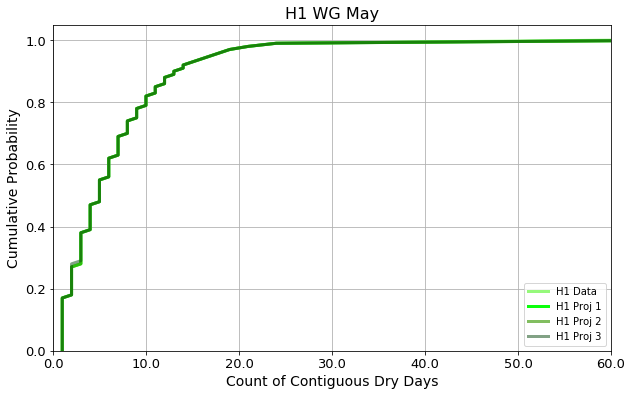

In [61]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( H1DMayDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:light green', label='H1 Data')
ax11.plot( H1P1MayDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:neon green', label='H1 Proj 1')
ax11.plot( H1P2MayDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:grass green', alpha=0.65, label='H1 Proj 2')
ax11.plot( H1P3MayDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:forest green', alpha=0.5, label='H1 Proj 3')
ax11.set_xlim( (0.0, 60.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("H1 WG May", fontsize=16)
ax11.set_xlabel('Count of Contiguous Dry Days', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [62]:
DatQs = H1DMayDF['Dry_Count'].quantile( q=OurQs )
P1Qs = H1P1MayDF['Dry_Count'].quantile( q=OurQs )
P2Qs = H1P2MayDF['Dry_Count'].quantile( q=OurQs )
P3Qs = H1P3MayDF['Dry_Count'].quantile( q=OurQs )

In [63]:
MaxVal = 40.0

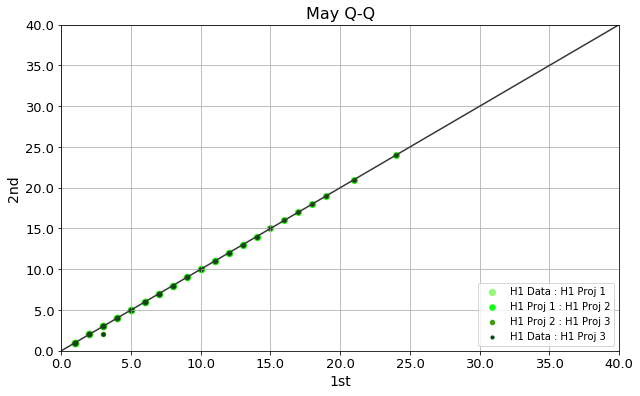

In [64]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DatQs.values, P1Qs.values, marker='o', color='xkcd:light green',
              label="H1 Data : H1 Proj 1", s=40 )
ax11.scatter( P1Qs.values, P2Qs.values, marker='o', color='xkcd:neon green',
              label="H1 Proj 1 : H1 Proj 2", s=30 )
ax11.scatter( P2Qs.values, P3Qs.values, marker='o', color='xkcd:grass green',
              label="H1 Proj 2 : H1 Proj 3", s=20)
ax11.scatter( DatQs.values, P3Qs.values, marker='o', color='xkcd:forest green',
              label="H1 Data : H1 Proj 3", s=10 )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("May Q-Q", fontsize=16)
ax11.set_xlabel('1st', fontsize=14 )
ax11.set_ylabel('2nd', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

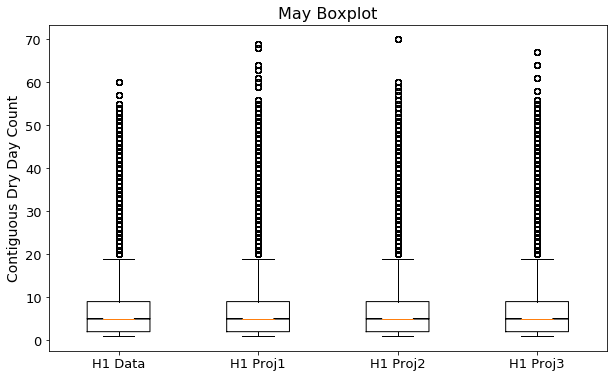

In [65]:
plotData = [ H1DMayDF['Dry_Count'].to_numpy(), H1P1MayDF['Dry_Count'].to_numpy(), 
             H1P2MayDF['Dry_Count'].to_numpy(), H1P3MayDF['Dry_Count'].to_numpy() ]
plotLabels = [ "H1 Data", "H1 Proj1", "H1 Proj2", "H1 Proj3" ]
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
bxout = ax11.boxplot( plotData, labels=plotLabels, notch=True )
ax11.set_title("May Boxplot", fontsize=16)
ax11.set_ylabel('Contiguous Dry Day Count', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)

## Jun

In [66]:
AveLister.append( [ H1DJunDF['Dry_Count'].mean(), H1P1JunDF['Dry_Count'].mean(), 
                    H1P2JunDF['Dry_Count'].mean(), H1P3JunDF['Dry_Count'].mean() ] )
VarLister.append( [ H1DJunDF['Dry_Count'].var(), H1P1JunDF['Dry_Count'].var(),
                    H1P2JunDF['Dry_Count'].var(), H1P3JunDF['Dry_Count'].var() ] )
SkewLister.append( [ H1DJunDF['Dry_Count'].skew(), H1P1JunDF['Dry_Count'].skew(),
                     H1P2JunDF['Dry_Count'].skew(), H1P3JunDF['Dry_Count'].skew() ] )
KurtLister.append( [ H1DJunDF['Dry_Count'].kurtosis(), H1P1JunDF['Dry_Count'].kurtosis(),
                     H1P2JunDF['Dry_Count'].kurtosis(), H1P3JunDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ H1DJunDF['Dry_Count'].count(), H1P1JunDF['Dry_Count'].count(),
                    H1P2JunDF['Dry_Count'].count(), H1P3JunDF['Dry_Count'].count() ] )
P1Data = (1.0 - (( H1DJunDF['Dry_Count'].var() - H1DJunDF['Dry_Count'].mean() ) / 
                           H1DJunDF['Dry_Count'].var() ) )
P1Proj1 = (1.0 - (( H1P1JunDF['Dry_Count'].var() - H1P1JunDF['Dry_Count'].mean() ) / 
                           H1P1JunDF['Dry_Count'].var() ) )
P1Proj2 = (1.0 - (( H1P2JunDF['Dry_Count'].var() - H1P2JunDF['Dry_Count'].mean() ) / 
                           H1P2JunDF['Dry_Count'].var() ) )
P1Proj3 = (1.0 - (( H1P3JunDF['Dry_Count'].var() - H1P3JunDF['Dry_Count'].mean() ) / 
                           H1P3JunDF['Dry_Count'].var() ) )
PLister.append( [ P1Data, P1Proj1, P1Proj2, P1Proj3 ] )
N1Data = ( H1DJunDF['Dry_Count'].mean()**2.0 / 
         ( H1DJunDF['Dry_Count'].var() - H1DJunDF['Dry_Count'].mean() ) )
N1Proj1 = ( H1P1JunDF['Dry_Count'].mean()**2.0 / 
          ( H1P1JunDF['Dry_Count'].var() - H1P1JunDF['Dry_Count'].mean() ) )
N1Proj2 = ( H1P2JunDF['Dry_Count'].mean()**2.0 / 
          ( H1P2JunDF['Dry_Count'].var() - H1P2JunDF['Dry_Count'].mean() ) )
N1Proj3 = ( H1P3JunDF['Dry_Count'].mean()**2.0 / 
          ( H1P3JunDF['Dry_Count'].var() - H1P3JunDF['Dry_Count'].mean() ) )
NLister.append( [ N1Data, N1Proj1, N1Proj2, N1Proj3 ] )
MedianLister.append( [ H1DJunDF['Dry_Count'].median(), H1P1JunDF['Dry_Count'].median(),
                       H1P2JunDF['Dry_Count'].median(), H1P3JunDF['Dry_Count'].median() ] )
MaxLister.append( [ H1DJunDF['Dry_Count'].max(), H1P1JunDF['Dry_Count'].max(),
                    H1P2JunDF['Dry_Count'].max(), H1P3JunDF['Dry_Count'].max() ] )
MinLister.append( [ H1DJunDF['Dry_Count'].min(), H1P1JunDF['Dry_Count'].min(),
                    H1P2JunDF['Dry_Count'].min(), H1P3JunDF['Dry_Count'].min() ] )

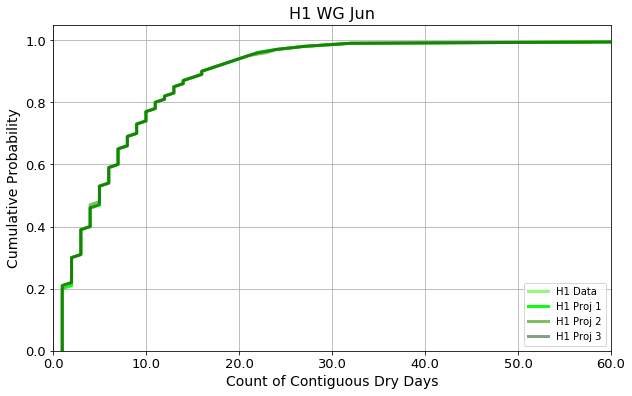

In [67]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( H1DJunDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:light green', label='H1 Data')
ax11.plot( H1P1JunDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:neon green', label='H1 Proj 1')
ax11.plot( H1P2JunDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:grass green', alpha=0.65, label='H1 Proj 2')
ax11.plot( H1P3JunDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:forest green', alpha=0.5, label='H1 Proj 3')
ax11.set_xlim( (0.0, 60.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("H1 WG Jun", fontsize=16)
ax11.set_xlabel('Count of Contiguous Dry Days', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [68]:
DatQs = H1DJunDF['Dry_Count'].quantile( q=OurQs )
P1Qs = H1P1JunDF['Dry_Count'].quantile( q=OurQs )
P2Qs = H1P2JunDF['Dry_Count'].quantile( q=OurQs )
P3Qs = H1P3JunDF['Dry_Count'].quantile( q=OurQs )

In [69]:
MaxVal = 40.0

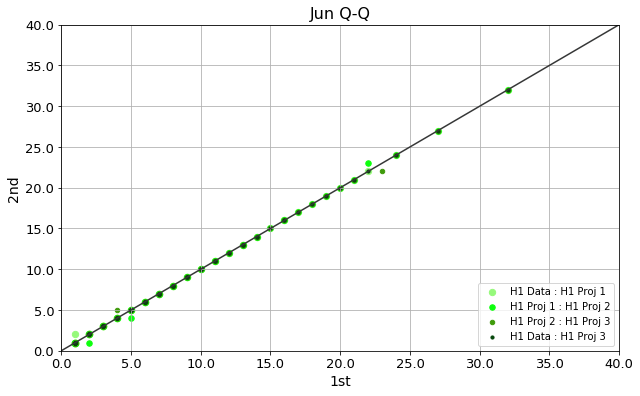

In [70]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DatQs.values, P1Qs.values, marker='o', color='xkcd:light green',
              label="H1 Data : H1 Proj 1", s=40 )
ax11.scatter( P1Qs.values, P2Qs.values, marker='o', color='xkcd:neon green',
              label="H1 Proj 1 : H1 Proj 2", s=30 )
ax11.scatter( P2Qs.values, P3Qs.values, marker='o', color='xkcd:grass green',
              label="H1 Proj 2 : H1 Proj 3", s=20)
ax11.scatter( DatQs.values, P3Qs.values, marker='o', color='xkcd:forest green',
              label="H1 Data : H1 Proj 3", s=10 )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jun Q-Q", fontsize=16)
ax11.set_xlabel('1st', fontsize=14 )
ax11.set_ylabel('2nd', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

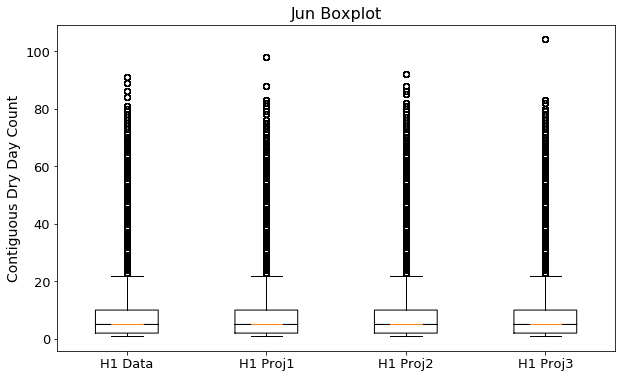

In [71]:
plotData = [ H1DJunDF['Dry_Count'].to_numpy(), H1P1JunDF['Dry_Count'].to_numpy(), 
             H1P2JunDF['Dry_Count'].to_numpy(), H1P3JunDF['Dry_Count'].to_numpy() ]
plotLabels = [ "H1 Data", "H1 Proj1", "H1 Proj2", "H1 Proj3" ]
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
bxout = ax11.boxplot( plotData, labels=plotLabels, notch=True )
ax11.set_title("Jun Boxplot", fontsize=16)
ax11.set_ylabel('Contiguous Dry Day Count', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)

## Jul

In [72]:
AveLister.append( [ H1DJulDF['Dry_Count'].mean(), H1P1JulDF['Dry_Count'].mean(), 
                    H1P2JulDF['Dry_Count'].mean(), H1P3JulDF['Dry_Count'].mean() ] )
VarLister.append( [ H1DJulDF['Dry_Count'].var(), H1P1JulDF['Dry_Count'].var(),
                    H1P2JulDF['Dry_Count'].var(), H1P3JulDF['Dry_Count'].var() ] )
SkewLister.append( [ H1DJulDF['Dry_Count'].skew(), H1P1JulDF['Dry_Count'].skew(),
                     H1P2JulDF['Dry_Count'].skew(), H1P3JulDF['Dry_Count'].skew() ] )
KurtLister.append( [ H1DJulDF['Dry_Count'].kurtosis(), H1P1JulDF['Dry_Count'].kurtosis(),
                     H1P2JulDF['Dry_Count'].kurtosis(), H1P3JulDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ H1DJulDF['Dry_Count'].count(), H1P1JulDF['Dry_Count'].count(),
                    H1P2JulDF['Dry_Count'].count(), H1P3JulDF['Dry_Count'].count() ] )
P1Data = (1.0 - (( H1DJulDF['Dry_Count'].var() - H1DJulDF['Dry_Count'].mean() ) / 
                           H1DJulDF['Dry_Count'].var() ) )
P1Proj1 = (1.0 - (( H1P1JulDF['Dry_Count'].var() - H1P1JulDF['Dry_Count'].mean() ) / 
                           H1P1JulDF['Dry_Count'].var() ) )
P1Proj2 = (1.0 - (( H1P2JulDF['Dry_Count'].var() - H1P2JulDF['Dry_Count'].mean() ) / 
                           H1P2JulDF['Dry_Count'].var() ) )
P1Proj3 = (1.0 - (( H1P3JulDF['Dry_Count'].var() - H1P3JulDF['Dry_Count'].mean() ) / 
                           H1P3JulDF['Dry_Count'].var() ) )
PLister.append( [ P1Data, P1Proj1, P1Proj2, P1Proj3 ] )
N1Data = ( H1DJulDF['Dry_Count'].mean()**2.0 / 
         ( H1DJulDF['Dry_Count'].var() - H1DJulDF['Dry_Count'].mean() ) )
N1Proj1 = ( H1P1JulDF['Dry_Count'].mean()**2.0 / 
          ( H1P1JulDF['Dry_Count'].var() - H1P1JulDF['Dry_Count'].mean() ) )
N1Proj2 = ( H1P2JulDF['Dry_Count'].mean()**2.0 / 
          ( H1P2JulDF['Dry_Count'].var() - H1P2JulDF['Dry_Count'].mean() ) )
N1Proj3 = ( H1P3JulDF['Dry_Count'].mean()**2.0 / 
          ( H1P3JulDF['Dry_Count'].var() - H1P3JulDF['Dry_Count'].mean() ) )
NLister.append( [ N1Data, N1Proj1, N1Proj2, N1Proj3 ] )
MedianLister.append( [ H1DJulDF['Dry_Count'].median(), H1P1JulDF['Dry_Count'].median(),
                       H1P2JulDF['Dry_Count'].median(), H1P3JulDF['Dry_Count'].median() ] )
MaxLister.append( [ H1DJulDF['Dry_Count'].max(), H1P1JulDF['Dry_Count'].max(),
                    H1P2JulDF['Dry_Count'].max(), H1P3JulDF['Dry_Count'].max() ] )
MinLister.append( [ H1DJulDF['Dry_Count'].min(), H1P1JulDF['Dry_Count'].min(),
                    H1P2JulDF['Dry_Count'].min(), H1P3JulDF['Dry_Count'].min() ] )

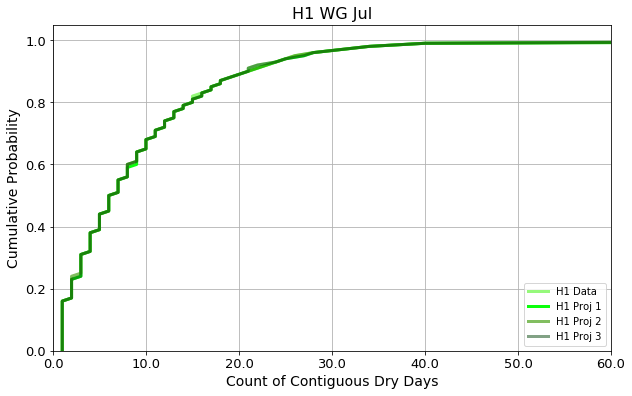

In [73]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( H1DJulDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:light green', label='H1 Data')
ax11.plot( H1P1JulDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:neon green', label='H1 Proj 1')
ax11.plot( H1P2JulDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:grass green', alpha=0.65, label='H1 Proj 2')
ax11.plot( H1P3JulDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:forest green', alpha=0.5, label='H1 Proj 3')
ax11.set_xlim( (0.0, 60.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("H1 WG Jul", fontsize=16)
ax11.set_xlabel('Count of Contiguous Dry Days', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [74]:
DatQs = H1DJulDF['Dry_Count'].quantile( q=OurQs )
P1Qs = H1P1JulDF['Dry_Count'].quantile( q=OurQs )
P2Qs = H1P2JulDF['Dry_Count'].quantile( q=OurQs )
P3Qs = H1P3JulDF['Dry_Count'].quantile( q=OurQs )

In [75]:
MaxVal = 40.0

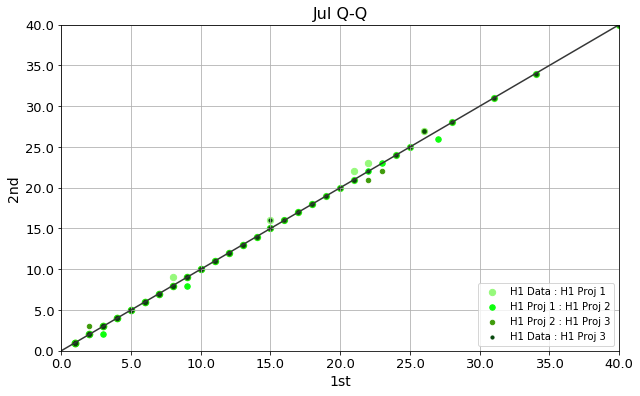

In [76]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DatQs.values, P1Qs.values, marker='o', color='xkcd:light green',
              label="H1 Data : H1 Proj 1", s=40 )
ax11.scatter( P1Qs.values, P2Qs.values, marker='o', color='xkcd:neon green',
              label="H1 Proj 1 : H1 Proj 2", s=30 )
ax11.scatter( P2Qs.values, P3Qs.values, marker='o', color='xkcd:grass green',
              label="H1 Proj 2 : H1 Proj 3", s=20)
ax11.scatter( DatQs.values, P3Qs.values, marker='o', color='xkcd:forest green',
              label="H1 Data : H1 Proj 3", s=10 )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Jul Q-Q", fontsize=16)
ax11.set_xlabel('1st', fontsize=14 )
ax11.set_ylabel('2nd', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

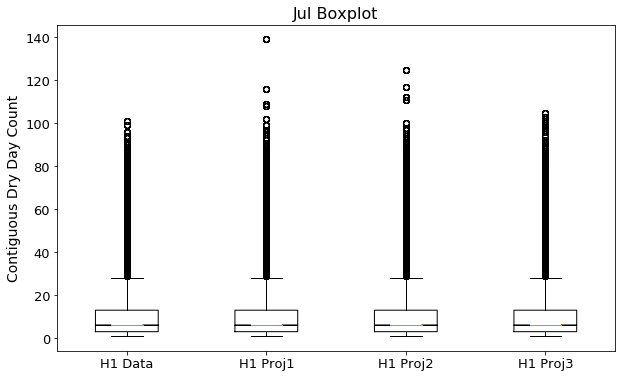

In [77]:
plotData = [ H1DJulDF['Dry_Count'].to_numpy(), H1P1JulDF['Dry_Count'].to_numpy(), 
             H1P2JulDF['Dry_Count'].to_numpy(), H1P3JulDF['Dry_Count'].to_numpy() ]
plotLabels = [ "H1 Data", "H1 Proj1", "H1 Proj2", "H1 Proj3" ]
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
bxout = ax11.boxplot( plotData, labels=plotLabels, notch=True )
ax11.set_title("Jul Boxplot", fontsize=16)
ax11.set_ylabel('Contiguous Dry Day Count', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)

## Aug

In [78]:
AveLister.append( [ H1DAugDF['Dry_Count'].mean(), H1P1AugDF['Dry_Count'].mean(), 
                    H1P2AugDF['Dry_Count'].mean(), H1P3AugDF['Dry_Count'].mean() ] )
VarLister.append( [ H1DAugDF['Dry_Count'].var(), H1P1AugDF['Dry_Count'].var(),
                    H1P2AugDF['Dry_Count'].var(), H1P3AugDF['Dry_Count'].var() ] )
SkewLister.append( [ H1DAugDF['Dry_Count'].skew(), H1P1AugDF['Dry_Count'].skew(),
                     H1P2AugDF['Dry_Count'].skew(), H1P3AugDF['Dry_Count'].skew() ] )
KurtLister.append( [ H1DAugDF['Dry_Count'].kurtosis(), H1P1AugDF['Dry_Count'].kurtosis(),
                     H1P2AugDF['Dry_Count'].kurtosis(), H1P3AugDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ H1DAugDF['Dry_Count'].count(), H1P1AugDF['Dry_Count'].count(),
                    H1P2AugDF['Dry_Count'].count(), H1P3AugDF['Dry_Count'].count() ] )
P1Data = (1.0 - (( H1DAugDF['Dry_Count'].var() - H1DAugDF['Dry_Count'].mean() ) / 
                           H1DAugDF['Dry_Count'].var() ) )
P1Proj1 = (1.0 - (( H1P1AugDF['Dry_Count'].var() - H1P1AugDF['Dry_Count'].mean() ) / 
                           H1P1AugDF['Dry_Count'].var() ) )
P1Proj2 = (1.0 - (( H1P2AugDF['Dry_Count'].var() - H1P2AugDF['Dry_Count'].mean() ) / 
                           H1P2AugDF['Dry_Count'].var() ) )
P1Proj3 = (1.0 - (( H1P3AugDF['Dry_Count'].var() - H1P3AugDF['Dry_Count'].mean() ) / 
                           H1P3AugDF['Dry_Count'].var() ) )
PLister.append( [ P1Data, P1Proj1, P1Proj2, P1Proj3 ] )
N1Data = ( H1DAugDF['Dry_Count'].mean()**2.0 / 
         ( H1DAugDF['Dry_Count'].var() - H1DAugDF['Dry_Count'].mean() ) )
N1Proj1 = ( H1P1AugDF['Dry_Count'].mean()**2.0 / 
          ( H1P1AugDF['Dry_Count'].var() - H1P1AugDF['Dry_Count'].mean() ) )
N1Proj2 = ( H1P2AugDF['Dry_Count'].mean()**2.0 / 
          ( H1P2AugDF['Dry_Count'].var() - H1P2AugDF['Dry_Count'].mean() ) )
N1Proj3 = ( H1P3AugDF['Dry_Count'].mean()**2.0 / 
          ( H1P3AugDF['Dry_Count'].var() - H1P3AugDF['Dry_Count'].mean() ) )
NLister.append( [ N1Data, N1Proj1, N1Proj2, N1Proj3 ] )
MedianLister.append( [ H1DAugDF['Dry_Count'].median(), H1P1AugDF['Dry_Count'].median(),
                       H1P2AugDF['Dry_Count'].median(), H1P3AugDF['Dry_Count'].median() ] )
MaxLister.append( [ H1DAugDF['Dry_Count'].max(), H1P1AugDF['Dry_Count'].max(),
                    H1P2AugDF['Dry_Count'].max(), H1P3AugDF['Dry_Count'].max() ] )
MinLister.append( [ H1DAugDF['Dry_Count'].min(), H1P1AugDF['Dry_Count'].min(),
                    H1P2AugDF['Dry_Count'].min(), H1P3AugDF['Dry_Count'].min() ] )

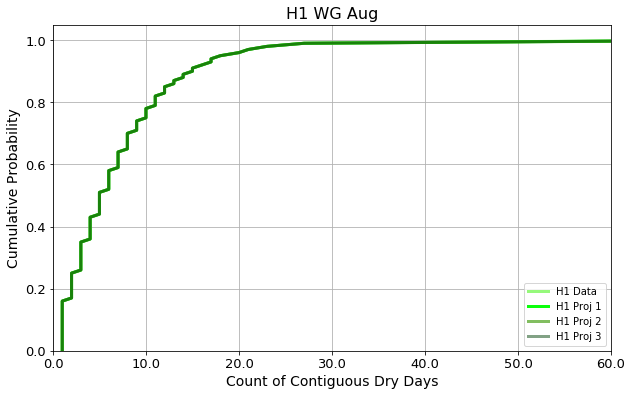

In [79]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( H1DAugDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:light green', label='H1 Data')
ax11.plot( H1P1AugDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:neon green', label='H1 Proj 1')
ax11.plot( H1P2AugDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:grass green', alpha=0.65, label='H1 Proj 2')
ax11.plot( H1P3AugDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:forest green', alpha=0.5, label='H1 Proj 3')
ax11.set_xlim( (0.0, 60.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("H1 WG Aug", fontsize=16)
ax11.set_xlabel('Count of Contiguous Dry Days', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [80]:
DatQs = H1DAugDF['Dry_Count'].quantile( q=OurQs )
P1Qs = H1P1AugDF['Dry_Count'].quantile( q=OurQs )
P2Qs = H1P2AugDF['Dry_Count'].quantile( q=OurQs )
P3Qs = H1P3AugDF['Dry_Count'].quantile( q=OurQs )

In [81]:
MaxVal = 40.0

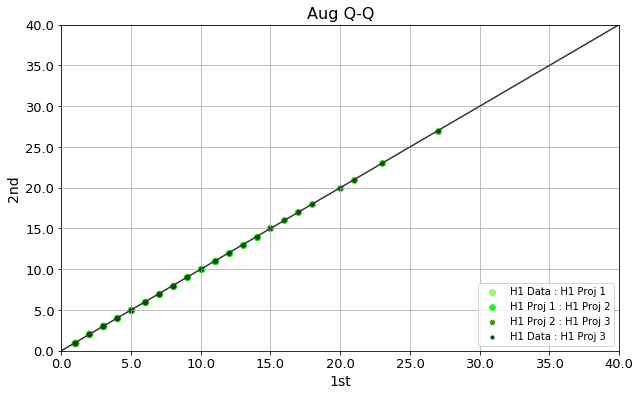

In [82]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DatQs.values, P1Qs.values, marker='o', color='xkcd:light green',
              label="H1 Data : H1 Proj 1", s=40 )
ax11.scatter( P1Qs.values, P2Qs.values, marker='o', color='xkcd:neon green',
              label="H1 Proj 1 : H1 Proj 2", s=30 )
ax11.scatter( P2Qs.values, P3Qs.values, marker='o', color='xkcd:grass green',
              label="H1 Proj 2 : H1 Proj 3", s=20)
ax11.scatter( DatQs.values, P3Qs.values, marker='o', color='xkcd:forest green',
              label="H1 Data : H1 Proj 3", s=10 )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Aug Q-Q", fontsize=16)
ax11.set_xlabel('1st', fontsize=14 )
ax11.set_ylabel('2nd', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

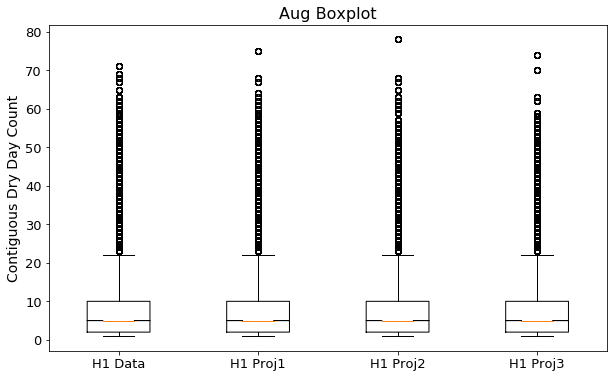

In [83]:
plotData = [ H1DAugDF['Dry_Count'].to_numpy(), H1P1AugDF['Dry_Count'].to_numpy(), 
             H1P2AugDF['Dry_Count'].to_numpy(), H1P3AugDF['Dry_Count'].to_numpy() ]
plotLabels = [ "H1 Data", "H1 Proj1", "H1 Proj2", "H1 Proj3" ]
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
bxout = ax11.boxplot( plotData, labels=plotLabels, notch=True )
ax11.set_title("Aug Boxplot", fontsize=16)
ax11.set_ylabel('Contiguous Dry Day Count', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)

## Sep

In [84]:
AveLister.append( [ H1DSepDF['Dry_Count'].mean(), H1P1SepDF['Dry_Count'].mean(), 
                    H1P2SepDF['Dry_Count'].mean(), H1P3SepDF['Dry_Count'].mean() ] )
VarLister.append( [ H1DSepDF['Dry_Count'].var(), H1P1SepDF['Dry_Count'].var(),
                    H1P2SepDF['Dry_Count'].var(), H1P3SepDF['Dry_Count'].var() ] )
SkewLister.append( [ H1DSepDF['Dry_Count'].skew(), H1P1SepDF['Dry_Count'].skew(),
                     H1P2SepDF['Dry_Count'].skew(), H1P3SepDF['Dry_Count'].skew() ] )
KurtLister.append( [ H1DSepDF['Dry_Count'].kurtosis(), H1P1SepDF['Dry_Count'].kurtosis(),
                     H1P2SepDF['Dry_Count'].kurtosis(), H1P3SepDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ H1DSepDF['Dry_Count'].count(), H1P1SepDF['Dry_Count'].count(),
                    H1P2SepDF['Dry_Count'].count(), H1P3SepDF['Dry_Count'].count() ] )
P1Data = (1.0 - (( H1DSepDF['Dry_Count'].var() - H1DSepDF['Dry_Count'].mean() ) / 
                           H1DSepDF['Dry_Count'].var() ) )
P1Proj1 = (1.0 - (( H1P1SepDF['Dry_Count'].var() - H1P1SepDF['Dry_Count'].mean() ) / 
                           H1P1SepDF['Dry_Count'].var() ) )
P1Proj2 = (1.0 - (( H1P2SepDF['Dry_Count'].var() - H1P2SepDF['Dry_Count'].mean() ) / 
                           H1P2SepDF['Dry_Count'].var() ) )
P1Proj3 = (1.0 - (( H1P3SepDF['Dry_Count'].var() - H1P3SepDF['Dry_Count'].mean() ) / 
                           H1P3SepDF['Dry_Count'].var() ) )
PLister.append( [ P1Data, P1Proj1, P1Proj2, P1Proj3 ] )
N1Data = ( H1DSepDF['Dry_Count'].mean()**2.0 / 
         ( H1DSepDF['Dry_Count'].var() - H1DSepDF['Dry_Count'].mean() ) )
N1Proj1 = ( H1P1SepDF['Dry_Count'].mean()**2.0 / 
          ( H1P1SepDF['Dry_Count'].var() - H1P1SepDF['Dry_Count'].mean() ) )
N1Proj2 = ( H1P2SepDF['Dry_Count'].mean()**2.0 / 
          ( H1P2SepDF['Dry_Count'].var() - H1P2SepDF['Dry_Count'].mean() ) )
N1Proj3 = ( H1P3SepDF['Dry_Count'].mean()**2.0 / 
          ( H1P3SepDF['Dry_Count'].var() - H1P3SepDF['Dry_Count'].mean() ) )
NLister.append( [ N1Data, N1Proj1, N1Proj2, N1Proj3 ] )
MedianLister.append( [ H1DSepDF['Dry_Count'].median(), H1P1SepDF['Dry_Count'].median(),
                       H1P2SepDF['Dry_Count'].median(), H1P3SepDF['Dry_Count'].median() ] )
MaxLister.append( [ H1DSepDF['Dry_Count'].max(), H1P1SepDF['Dry_Count'].max(),
                    H1P2SepDF['Dry_Count'].max(), H1P3SepDF['Dry_Count'].max() ] )
MinLister.append( [ H1DSepDF['Dry_Count'].min(), H1P1SepDF['Dry_Count'].min(),
                    H1P2SepDF['Dry_Count'].min(), H1P3SepDF['Dry_Count'].min() ] )

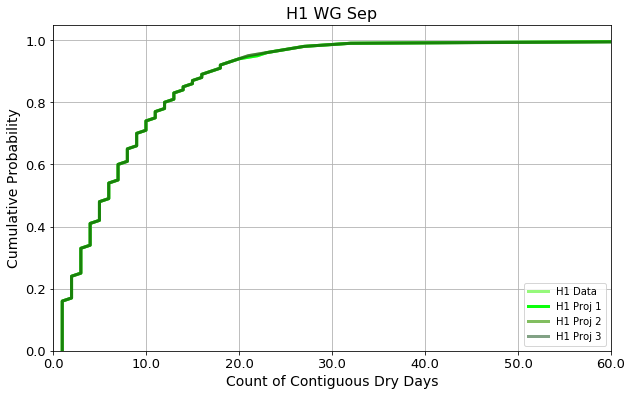

In [85]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( H1DSepDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:light green', label='H1 Data')
ax11.plot( H1P1SepDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:neon green', label='H1 Proj 1')
ax11.plot( H1P2SepDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:grass green', alpha=0.65, label='H1 Proj 2')
ax11.plot( H1P3SepDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:forest green', alpha=0.5, label='H1 Proj 3')
ax11.set_xlim( (0.0, 60.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("H1 WG Sep", fontsize=16)
ax11.set_xlabel('Count of Contiguous Dry Days', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [86]:
DatQs = H1DSepDF['Dry_Count'].quantile( q=OurQs )
P1Qs = H1P1SepDF['Dry_Count'].quantile( q=OurQs )
P2Qs = H1P2SepDF['Dry_Count'].quantile( q=OurQs )
P3Qs = H1P3SepDF['Dry_Count'].quantile( q=OurQs )

In [87]:
MaxVal = 40.0

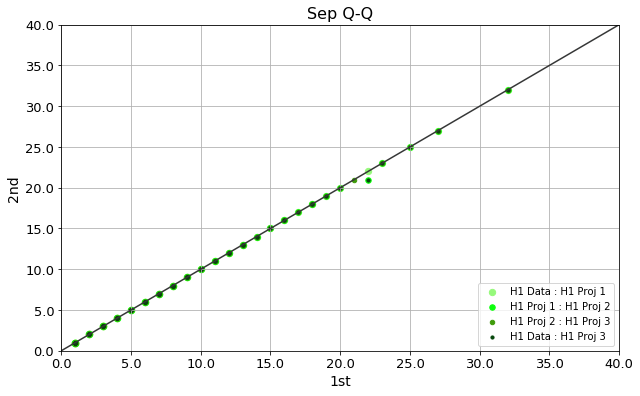

In [88]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DatQs.values, P1Qs.values, marker='o', color='xkcd:light green',
              label="H1 Data : H1 Proj 1", s=40 )
ax11.scatter( P1Qs.values, P2Qs.values, marker='o', color='xkcd:neon green',
              label="H1 Proj 1 : H1 Proj 2", s=30 )
ax11.scatter( P2Qs.values, P3Qs.values, marker='o', color='xkcd:grass green',
              label="H1 Proj 2 : H1 Proj 3", s=20)
ax11.scatter( DatQs.values, P3Qs.values, marker='o', color='xkcd:forest green',
              label="H1 Data : H1 Proj 3", s=10 )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Sep Q-Q", fontsize=16)
ax11.set_xlabel('1st', fontsize=14 )
ax11.set_ylabel('2nd', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

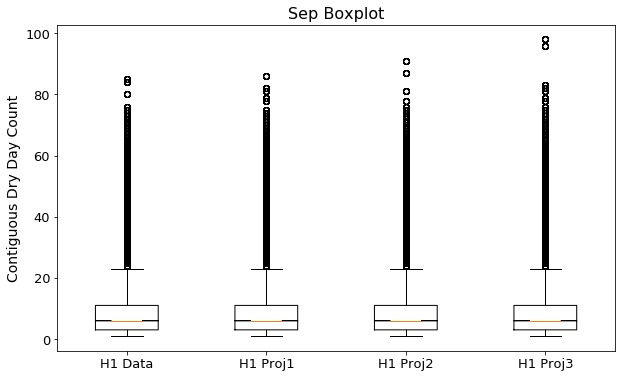

In [89]:
plotData = [ H1DSepDF['Dry_Count'].to_numpy(), H1P1SepDF['Dry_Count'].to_numpy(), 
             H1P2SepDF['Dry_Count'].to_numpy(), H1P3SepDF['Dry_Count'].to_numpy() ]
plotLabels = [ "H1 Data", "H1 Proj1", "H1 Proj2", "H1 Proj3" ]
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
bxout = ax11.boxplot( plotData, labels=plotLabels, notch=True )
ax11.set_title("Sep Boxplot", fontsize=16)
ax11.set_ylabel('Contiguous Dry Day Count', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)

## Oct

In [90]:
AveLister.append( [ H1DOctDF['Dry_Count'].mean(), H1P1OctDF['Dry_Count'].mean(), 
                    H1P2OctDF['Dry_Count'].mean(), H1P3OctDF['Dry_Count'].mean() ] )
VarLister.append( [ H1DOctDF['Dry_Count'].var(), H1P1OctDF['Dry_Count'].var(),
                    H1P2OctDF['Dry_Count'].var(), H1P3OctDF['Dry_Count'].var() ] )
SkewLister.append( [ H1DOctDF['Dry_Count'].skew(), H1P1OctDF['Dry_Count'].skew(),
                     H1P2OctDF['Dry_Count'].skew(), H1P3OctDF['Dry_Count'].skew() ] )
KurtLister.append( [ H1DOctDF['Dry_Count'].kurtosis(), H1P1OctDF['Dry_Count'].kurtosis(),
                     H1P2OctDF['Dry_Count'].kurtosis(), H1P3OctDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ H1DOctDF['Dry_Count'].count(), H1P1OctDF['Dry_Count'].count(),
                    H1P2OctDF['Dry_Count'].count(), H1P3OctDF['Dry_Count'].count() ] )
P1Data = (1.0 - (( H1DOctDF['Dry_Count'].var() - H1DOctDF['Dry_Count'].mean() ) / 
                           H1DOctDF['Dry_Count'].var() ) )
P1Proj1 = (1.0 - (( H1P1OctDF['Dry_Count'].var() - H1P1OctDF['Dry_Count'].mean() ) / 
                           H1P1OctDF['Dry_Count'].var() ) )
P1Proj2 = (1.0 - (( H1P2OctDF['Dry_Count'].var() - H1P2OctDF['Dry_Count'].mean() ) / 
                           H1P2OctDF['Dry_Count'].var() ) )
P1Proj3 = (1.0 - (( H1P3OctDF['Dry_Count'].var() - H1P3OctDF['Dry_Count'].mean() ) / 
                           H1P3OctDF['Dry_Count'].var() ) )
PLister.append( [ P1Data, P1Proj1, P1Proj2, P1Proj3 ] )
N1Data = ( H1DOctDF['Dry_Count'].mean()**2.0 / 
         ( H1DOctDF['Dry_Count'].var() - H1DOctDF['Dry_Count'].mean() ) )
N1Proj1 = ( H1P1OctDF['Dry_Count'].mean()**2.0 / 
          ( H1P1OctDF['Dry_Count'].var() - H1P1OctDF['Dry_Count'].mean() ) )
N1Proj2 = ( H1P2OctDF['Dry_Count'].mean()**2.0 / 
          ( H1P2OctDF['Dry_Count'].var() - H1P2OctDF['Dry_Count'].mean() ) )
N1Proj3 = ( H1P3OctDF['Dry_Count'].mean()**2.0 / 
          ( H1P3OctDF['Dry_Count'].var() - H1P3OctDF['Dry_Count'].mean() ) )
NLister.append( [ N1Data, N1Proj1, N1Proj2, N1Proj3 ] )
MedianLister.append( [ H1DOctDF['Dry_Count'].median(), H1P1OctDF['Dry_Count'].median(),
                       H1P2OctDF['Dry_Count'].median(), H1P3OctDF['Dry_Count'].median() ] )
MaxLister.append( [ H1DOctDF['Dry_Count'].max(), H1P1OctDF['Dry_Count'].max(),
                    H1P2OctDF['Dry_Count'].max(), H1P3OctDF['Dry_Count'].max() ] )
MinLister.append( [ H1DOctDF['Dry_Count'].min(), H1P1OctDF['Dry_Count'].min(),
                    H1P2OctDF['Dry_Count'].min(), H1P3OctDF['Dry_Count'].min() ] )

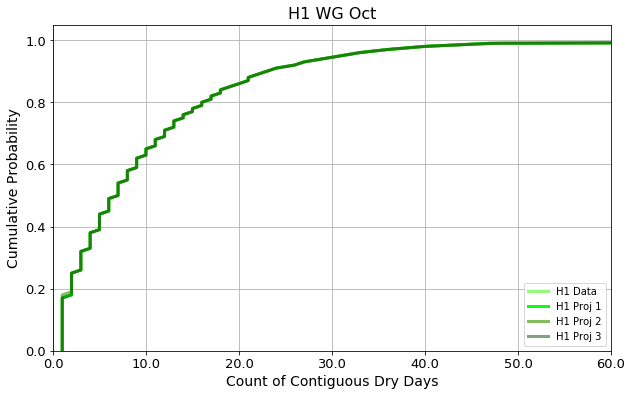

In [91]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( H1DOctDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:light green', label='H1 Data')
ax11.plot( H1P1OctDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:neon green', label='H1 Proj 1')
ax11.plot( H1P2OctDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:grass green', alpha=0.65, label='H1 Proj 2')
ax11.plot( H1P3OctDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:forest green', alpha=0.5, label='H1 Proj 3')
ax11.set_xlim( (0.0, 60.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("H1 WG Oct", fontsize=16)
ax11.set_xlabel('Count of Contiguous Dry Days', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [92]:
DatQs = H1DOctDF['Dry_Count'].quantile( q=OurQs )
P1Qs = H1P1OctDF['Dry_Count'].quantile( q=OurQs )
P2Qs = H1P2OctDF['Dry_Count'].quantile( q=OurQs )
P3Qs = H1P3OctDF['Dry_Count'].quantile( q=OurQs )

In [93]:
MaxVal = 40.0

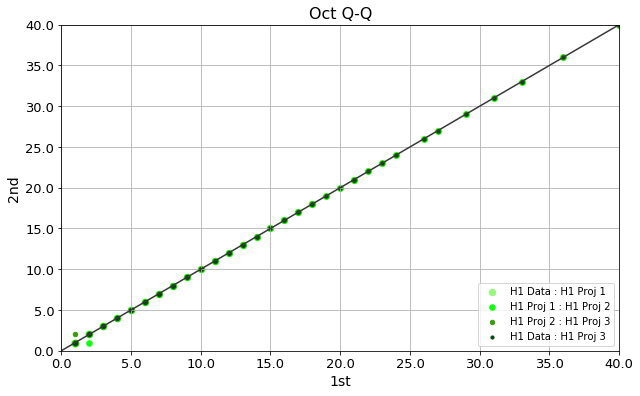

In [94]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DatQs.values, P1Qs.values, marker='o', color='xkcd:light green',
              label="H1 Data : H1 Proj 1", s=40 )
ax11.scatter( P1Qs.values, P2Qs.values, marker='o', color='xkcd:neon green',
              label="H1 Proj 1 : H1 Proj 2", s=30 )
ax11.scatter( P2Qs.values, P3Qs.values, marker='o', color='xkcd:grass green',
              label="H1 Proj 2 : H1 Proj 3", s=20)
ax11.scatter( DatQs.values, P3Qs.values, marker='o', color='xkcd:forest green',
              label="H1 Data : H1 Proj 3", s=10 )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Oct Q-Q", fontsize=16)
ax11.set_xlabel('1st', fontsize=14 )
ax11.set_ylabel('2nd', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

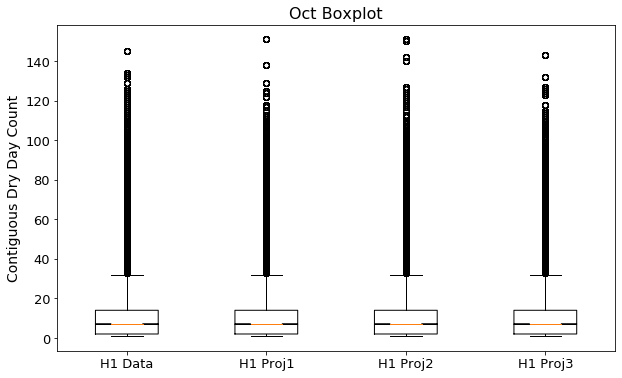

In [95]:
plotData = [ H1DOctDF['Dry_Count'].to_numpy(), H1P1OctDF['Dry_Count'].to_numpy(), 
             H1P2OctDF['Dry_Count'].to_numpy(), H1P3OctDF['Dry_Count'].to_numpy() ]
plotLabels = [ "H1 Data", "H1 Proj1", "H1 Proj2", "H1 Proj3" ]
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
bxout = ax11.boxplot( plotData, labels=plotLabels, notch=True )
ax11.set_title("Oct Boxplot", fontsize=16)
ax11.set_ylabel('Contiguous Dry Day Count', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)

## Nov

In [96]:
AveLister.append( [ H1DNovDF['Dry_Count'].mean(), H1P1NovDF['Dry_Count'].mean(), 
                    H1P2NovDF['Dry_Count'].mean(), H1P3NovDF['Dry_Count'].mean() ] )
VarLister.append( [ H1DNovDF['Dry_Count'].var(), H1P1NovDF['Dry_Count'].var(),
                    H1P2NovDF['Dry_Count'].var(), H1P3NovDF['Dry_Count'].var() ] )
SkewLister.append( [ H1DNovDF['Dry_Count'].skew(), H1P1NovDF['Dry_Count'].skew(),
                     H1P2NovDF['Dry_Count'].skew(), H1P3NovDF['Dry_Count'].skew() ] )
KurtLister.append( [ H1DNovDF['Dry_Count'].kurtosis(), H1P1NovDF['Dry_Count'].kurtosis(),
                     H1P2NovDF['Dry_Count'].kurtosis(), H1P3NovDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ H1DNovDF['Dry_Count'].count(), H1P1NovDF['Dry_Count'].count(),
                    H1P2NovDF['Dry_Count'].count(), H1P3NovDF['Dry_Count'].count() ] )
P1Data = (1.0 - (( H1DNovDF['Dry_Count'].var() - H1DNovDF['Dry_Count'].mean() ) / 
                           H1DNovDF['Dry_Count'].var() ) )
P1Proj1 = (1.0 - (( H1P1NovDF['Dry_Count'].var() - H1P1NovDF['Dry_Count'].mean() ) / 
                           H1P1NovDF['Dry_Count'].var() ) )
P1Proj2 = (1.0 - (( H1P2NovDF['Dry_Count'].var() - H1P2NovDF['Dry_Count'].mean() ) / 
                           H1P2NovDF['Dry_Count'].var() ) )
P1Proj3 = (1.0 - (( H1P3NovDF['Dry_Count'].var() - H1P3NovDF['Dry_Count'].mean() ) / 
                           H1P3NovDF['Dry_Count'].var() ) )
PLister.append( [ P1Data, P1Proj1, P1Proj2, P1Proj3 ] )
N1Data = ( H1DNovDF['Dry_Count'].mean()**2.0 / 
         ( H1DNovDF['Dry_Count'].var() - H1DNovDF['Dry_Count'].mean() ) )
N1Proj1 = ( H1P1NovDF['Dry_Count'].mean()**2.0 / 
          ( H1P1NovDF['Dry_Count'].var() - H1P1NovDF['Dry_Count'].mean() ) )
N1Proj2 = ( H1P2NovDF['Dry_Count'].mean()**2.0 / 
          ( H1P2NovDF['Dry_Count'].var() - H1P2NovDF['Dry_Count'].mean() ) )
N1Proj3 = ( H1P3NovDF['Dry_Count'].mean()**2.0 / 
          ( H1P3NovDF['Dry_Count'].var() - H1P3NovDF['Dry_Count'].mean() ) )
NLister.append( [ N1Data, N1Proj1, N1Proj2, N1Proj3 ] )
MedianLister.append( [ H1DNovDF['Dry_Count'].median(), H1P1NovDF['Dry_Count'].median(),
                       H1P2NovDF['Dry_Count'].median(), H1P3NovDF['Dry_Count'].median() ] )
MaxLister.append( [ H1DNovDF['Dry_Count'].max(), H1P1NovDF['Dry_Count'].max(),
                    H1P2NovDF['Dry_Count'].max(), H1P3NovDF['Dry_Count'].max() ] )
MinLister.append( [ H1DNovDF['Dry_Count'].min(), H1P1NovDF['Dry_Count'].min(),
                    H1P2NovDF['Dry_Count'].min(), H1P3NovDF['Dry_Count'].min() ] )

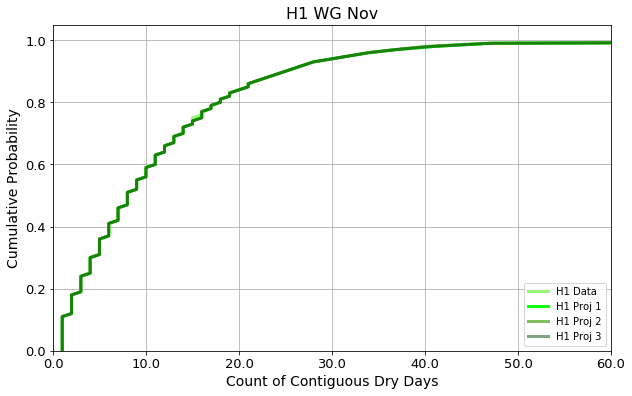

In [97]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( H1DNovDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:light green', label='H1 Data')
ax11.plot( H1P1NovDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:neon green', label='H1 Proj 1')
ax11.plot( H1P2NovDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:grass green', alpha=0.65, label='H1 Proj 2')
ax11.plot( H1P3NovDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:forest green', alpha=0.5, label='H1 Proj 3')
ax11.set_xlim( (0.0, 60.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("H1 WG Nov", fontsize=16)
ax11.set_xlabel('Count of Contiguous Dry Days', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [98]:
DatQs = H1DNovDF['Dry_Count'].quantile( q=OurQs )
P1Qs = H1P1NovDF['Dry_Count'].quantile( q=OurQs )
P2Qs = H1P2NovDF['Dry_Count'].quantile( q=OurQs )
P3Qs = H1P3NovDF['Dry_Count'].quantile( q=OurQs )

In [99]:
MaxVal = 40.0

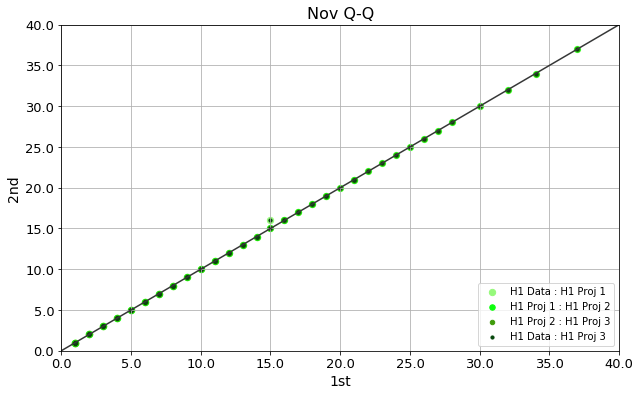

In [100]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DatQs.values, P1Qs.values, marker='o', color='xkcd:light green',
              label="H1 Data : H1 Proj 1", s=40 )
ax11.scatter( P1Qs.values, P2Qs.values, marker='o', color='xkcd:neon green',
              label="H1 Proj 1 : H1 Proj 2", s=30 )
ax11.scatter( P2Qs.values, P3Qs.values, marker='o', color='xkcd:grass green',
              label="H1 Proj 2 : H1 Proj 3", s=20)
ax11.scatter( DatQs.values, P3Qs.values, marker='o', color='xkcd:forest green',
              label="H1 Data : H1 Proj 3", s=10 )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Nov Q-Q", fontsize=16)
ax11.set_xlabel('1st', fontsize=14 )
ax11.set_ylabel('2nd', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

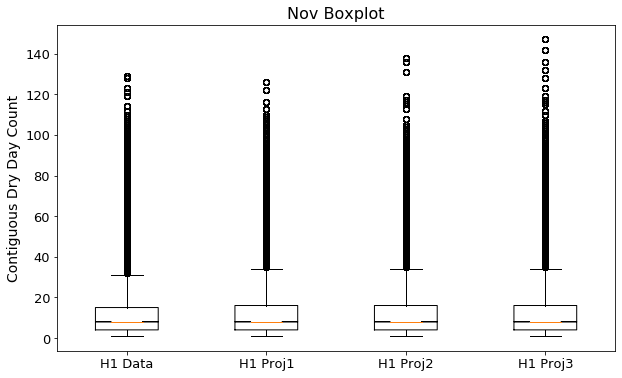

In [101]:
plotData = [ H1DNovDF['Dry_Count'].to_numpy(), H1P1NovDF['Dry_Count'].to_numpy(), 
             H1P2NovDF['Dry_Count'].to_numpy(), H1P3NovDF['Dry_Count'].to_numpy() ]
plotLabels = [ "H1 Data", "H1 Proj1", "H1 Proj2", "H1 Proj3" ]
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
bxout = ax11.boxplot( plotData, labels=plotLabels, notch=True )
ax11.set_title("Nov Boxplot", fontsize=16)
ax11.set_ylabel('Contiguous Dry Day Count', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)

## Dec

In [102]:
AveLister.append( [ H1DDecDF['Dry_Count'].mean(), H1P1DecDF['Dry_Count'].mean(), 
                    H1P2DecDF['Dry_Count'].mean(), H1P3DecDF['Dry_Count'].mean() ] )
VarLister.append( [ H1DDecDF['Dry_Count'].var(), H1P1DecDF['Dry_Count'].var(),
                    H1P2DecDF['Dry_Count'].var(), H1P3DecDF['Dry_Count'].var() ] )
SkewLister.append( [ H1DDecDF['Dry_Count'].skew(), H1P1DecDF['Dry_Count'].skew(),
                     H1P2DecDF['Dry_Count'].skew(), H1P3DecDF['Dry_Count'].skew() ] )
KurtLister.append( [ H1DDecDF['Dry_Count'].kurtosis(), H1P1DecDF['Dry_Count'].kurtosis(),
                     H1P2DecDF['Dry_Count'].kurtosis(), H1P3DecDF['Dry_Count'].kurtosis() ] )
CntLister.append( [ H1DDecDF['Dry_Count'].count(), H1P1DecDF['Dry_Count'].count(),
                    H1P2DecDF['Dry_Count'].count(), H1P3DecDF['Dry_Count'].count() ] )
P1Data = (1.0 - (( H1DDecDF['Dry_Count'].var() - H1DDecDF['Dry_Count'].mean() ) / 
                           H1DDecDF['Dry_Count'].var() ) )
P1Proj1 = (1.0 - (( H1P1DecDF['Dry_Count'].var() - H1P1DecDF['Dry_Count'].mean() ) / 
                           H1P1DecDF['Dry_Count'].var() ) )
P1Proj2 = (1.0 - (( H1P2DecDF['Dry_Count'].var() - H1P2DecDF['Dry_Count'].mean() ) / 
                           H1P2DecDF['Dry_Count'].var() ) )
P1Proj3 = (1.0 - (( H1P3DecDF['Dry_Count'].var() - H1P3DecDF['Dry_Count'].mean() ) / 
                           H1P3DecDF['Dry_Count'].var() ) )
PLister.append( [ P1Data, P1Proj1, P1Proj2, P1Proj3 ] )
N1Data = ( H1DDecDF['Dry_Count'].mean()**2.0 / 
         ( H1DDecDF['Dry_Count'].var() - H1DDecDF['Dry_Count'].mean() ) )
N1Proj1 = ( H1P1DecDF['Dry_Count'].mean()**2.0 / 
          ( H1P1DecDF['Dry_Count'].var() - H1P1DecDF['Dry_Count'].mean() ) )
N1Proj2 = ( H1P2DecDF['Dry_Count'].mean()**2.0 / 
          ( H1P2DecDF['Dry_Count'].var() - H1P2DecDF['Dry_Count'].mean() ) )
N1Proj3 = ( H1P3DecDF['Dry_Count'].mean()**2.0 / 
          ( H1P3DecDF['Dry_Count'].var() - H1P3DecDF['Dry_Count'].mean() ) )
NLister.append( [ N1Data, N1Proj1, N1Proj2, N1Proj3 ] )
MedianLister.append( [ H1DDecDF['Dry_Count'].median(), H1P1DecDF['Dry_Count'].median(),
                       H1P2DecDF['Dry_Count'].median(), H1P3DecDF['Dry_Count'].median() ] )
MaxLister.append( [ H1DDecDF['Dry_Count'].max(), H1P1DecDF['Dry_Count'].max(),
                    H1P2DecDF['Dry_Count'].max(), H1P3DecDF['Dry_Count'].max() ] )
MinLister.append( [ H1DDecDF['Dry_Count'].min(), H1P1DecDF['Dry_Count'].min(),
                    H1P2DecDF['Dry_Count'].min(), H1P3DecDF['Dry_Count'].min() ] )

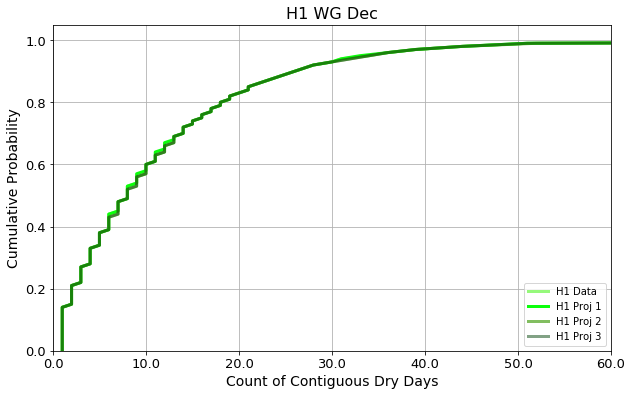

In [103]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.plot( H1DDecDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:light green', label='H1 Data')
ax11.plot( H1P1DecDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:neon green', label='H1 Proj 1')
ax11.plot( H1P2DecDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:grass green', alpha=0.65, label='H1 Proj 2')
ax11.plot( H1P3DecDF['Dry_Count'].quantile(q=OurQs), OurQs, linestyle='-', linewidth=3,
           color='xkcd:forest green', alpha=0.5, label='H1 Proj 3')
ax11.set_xlim( (0.0, 60.0))
ax11.set_ylim( (0.0, 1.05) )
ax11.set_title("H1 WG Dec", fontsize=16)
ax11.set_xlabel('Count of Contiguous Dry Days', fontsize=14 )
ax11.set_ylabel('Cumulative Probability', fontsize=14)
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [104]:
DatQs = H1DDecDF['Dry_Count'].quantile( q=OurQs )
P1Qs = H1P1DecDF['Dry_Count'].quantile( q=OurQs )
P2Qs = H1P2DecDF['Dry_Count'].quantile( q=OurQs )
P3Qs = H1P3DecDF['Dry_Count'].quantile( q=OurQs )

In [105]:
MaxVal = 40.0

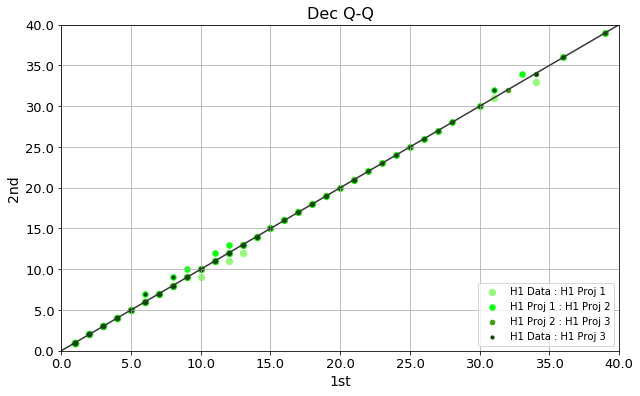

In [106]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
ax11.scatter( DatQs.values, P1Qs.values, marker='o', color='xkcd:light green',
              label="H1 Data : H1 Proj 1", s=40 )
ax11.scatter( P1Qs.values, P2Qs.values, marker='o', color='xkcd:neon green',
              label="H1 Proj 1 : H1 Proj 2", s=30 )
ax11.scatter( P2Qs.values, P3Qs.values, marker='o', color='xkcd:grass green',
              label="H1 Proj 2 : H1 Proj 3", s=20)
ax11.scatter( DatQs.values, P3Qs.values, marker='o', color='xkcd:forest green',
              label="H1 Data : H1 Proj 3", s=10 )
ax11.plot( [0.0, MaxVal], [0.0, MaxVal], linestyle='-', color='xkcd:dark grey' )
ax11.set_title("Dec Q-Q", fontsize=16)
ax11.set_xlabel('1st', fontsize=14 )
ax11.set_ylabel('2nd', fontsize=14)
ax11.set_xlim( (0.0, MaxVal) )
ax11.set_ylim( (0.0, MaxVal) )
ax11.grid( b=True )
ax11.legend(loc='lower right')
ax11.tick_params(axis='both', which='major', labelsize=13)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

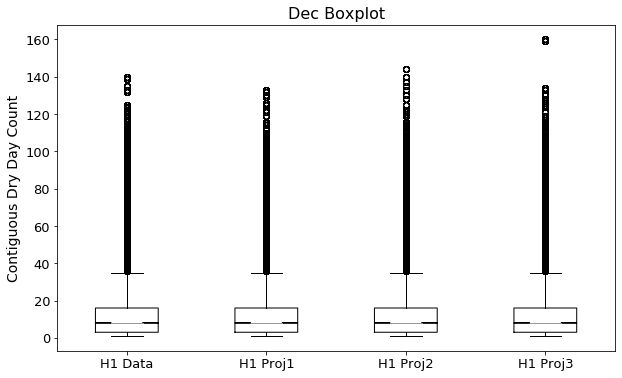

In [107]:
plotData = [ H1DDecDF['Dry_Count'].to_numpy(), H1P1DecDF['Dry_Count'].to_numpy(), 
             H1P2DecDF['Dry_Count'].to_numpy(), H1P3DecDF['Dry_Count'].to_numpy() ]
plotLabels = [ "H1 Data", "H1 Proj1", "H1 Proj2", "H1 Proj3" ]
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 6.0)
ax11 = Fig1.add_subplot(111)
bxout = ax11.boxplot( plotData, labels=plotLabels, notch=True )
ax11.set_title("Dec Boxplot", fontsize=16)
ax11.set_ylabel('Contiguous Dry Day Count', fontsize=14)
ax11.tick_params(axis='both', which='major', labelsize=13)

## Output

In [108]:
AveLister.append( [ H1DAve, H1P1Ave, H1P2Ave, H1P3Ave ] )
VarLister.append( [ H1DVar, H1P1Var, H1P2Var, H1P3Var ] )
SkewLister.append( [ H1DSkew, H1P1Skew, H1P2Skew, H1P3Skew ] )
KurtLister.append( [ H1DKurt, H1P1Kurt, H1P2Kurt,H1P3Kurt ] )
CntLister.append( [ H1DCnt, H1P1Cnt, H1P2Cnt, H1P3Cnt ] )
PLister.append( [ H1DPlist, H1P1Plist, H1P2Plist, H1P3Plist ] )
NLister.append( [ H1DNlist, H1P1Nlist, H1P2Nlist, H1P3Nlist ] )
MedianLister.append( [ H1DMedian, H1P1Median, H1P2Median, H1P3Median ] )
MaxLister.append( [ H1DMax, H1P1Max, H1P2Max, H1P3Max ] )
MinLister.append( [ H1DMin, H1P1Min, H1P2Min, H1P3Min ] )

In [109]:
DataDict = dict()
DataDict["H1D_Ave"] = np.array( [x[0] for x in AveLister], np.float32 )
DataDict["H1P1_Ave"] = np.array( [x[1] for x in AveLister], np.float32 )
DataDict["H1P2_Ave"] = np.array( [x[2] for x in AveLister], np.float32 )
DataDict["H1P3_Ave"] = np.array( [x[3] for x in AveLister], np.float32 )
DataDict["H1D_Med"] = np.array( [x[0] for x in MedianLister], np.float32 )
DataDict["H1P1_Med"] = np.array( [x[1] for x in MedianLister], np.float32 )
DataDict["H1P2_Med"] = np.array( [x[2] for x in MedianLister], np.float32 )
DataDict["H1P3_1Med"] = np.array( [x[3] for x in MedianLister], np.float32 )
DataDict["H1D_Max"] = np.array( [x[0] for x in MaxLister], np.float32 )
DataDict["H1P1_Max"] = np.array( [x[1] for x in MaxLister], np.float32 )
DataDict["H1P2_Max"] = np.array( [x[2] for x in MaxLister], np.float32 )
DataDict["H1P3_Max"] = np.array( [x[3] for x in MaxLister], np.float32 )
DataDict["H1D_Min"] = np.array( [x[0] for x in MinLister], np.float32 )
DataDict["H1P1_Min"] = np.array( [x[1] for x in MinLister], np.float32 )
DataDict["H1P2_Min"] = np.array( [x[2] for x in MinLister], np.float32 )
DataDict["H1P3_Min"] = np.array( [x[3] for x in MinLister], np.float32 )    
DataDict["H1D_Var"] = np.array( [x[0] for x in VarLister], np.float32 )
DataDict["H1P1_Var"] = np.array( [x[1] for x in VarLister], np.float32 )
DataDict["H1P2_Var"] = np.array( [x[2] for x in VarLister], np.float32 )
DataDict["H1P3_Var"] = np.array( [x[3] for x in VarLister], np.float32 )
DataDict["H1D_Skew"] = np.array( [x[0] for x in SkewLister], np.float32 )
DataDict["H1P1_Skew"] = np.array( [x[1] for x in SkewLister], np.float32 )
DataDict["H1P2_Skew"] = np.array( [x[2] for x in SkewLister], np.float32 )
DataDict["H1P3_Skew"] = np.array( [x[3] for x in SkewLister], np.float32 )
DataDict["H1D_Kurt"] = np.array( [x[0] for x in KurtLister], np.float32 )
DataDict["H1P1_Kurt"] = np.array( [x[1] for x in KurtLister], np.float32 )
DataDict["H1P2_Kurt"] = np.array( [x[2] for x in KurtLister], np.float32 )
DataDict["H1P3_Kurt"] = np.array( [x[3] for x in KurtLister], np.float32 )
DataDict["H1D_Cnt"] = np.array( [x[0] for x in CntLister], np.float32 )
DataDict["H1P1_Cnt"] = np.array( [x[1] for x in CntLister], np.float32 )
DataDict["H1P2_Cnt"] = np.array( [x[2] for x in CntLister], np.float32 )
DataDict["H1P3_Cnt"] = np.array( [x[3] for x in CntLister], np.float32 )
SumCompDF = pd.DataFrame( index=MonthLister, data=DataDict )

In [110]:
OutFileFP = os.path.normpath( os.path.join( OUT_DIR, "%s_WG_DryDay_Projections.xlsx" % OUT_ROOT ) )
with pd.ExcelWriter( OutFileFP, engine="openpyxl" ) as writer:
    SumCompDF.to_excel( writer, sheet_name="Summary" )